<a href="https://colab.research.google.com/github/NeginHz/NegTalk/blob/main/Copy1_MH_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Preparation and Clustering for Mental Health Dataset
This notebook demonstrates the data cleaning and preparation and cLustering process for a mental health dataset. The goal is to clean, preprocess, and prepare the data for further analysis or modeling. Each step has been documented, and the code is structured for clarity.

## Table of Contents
1. **Introduction**
2. **Data Loading**
3. **Data Exploration**
4. **Data Cleaning**
5. **Feature Engineering**
6. **Export Cleaned Data**

## 1. Introduction

This notebook is designed to:
- Load a mental health dataset.
- Explore the dataset for inconsistencies and missing values.
- Apply data cleaning steps.
- Engineer new features for analysis.
- Save the processed dataset.

In [1]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00


### Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture

## 2. Data Loading
### Load Dataset

In [3]:
# Load the dataset
data = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
# Display the first few rows of the dataset
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


## 3. Data Exploration

### Overview of the Dataset

In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

### Check for Missing Values

In [5]:
# Count missing values in each column
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?                                                        1289
If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?                                                1229
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?                                                               1146
Do you believe your productivity is ever affected by a mental health issue?                                                                                                         1146
If you have revealed a mental health issue to a coworker or employee, do yo

In [6]:
# # Visualize missing values using a heatmap
# plt.figure(figsize=(10, 12))
# sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Values in the Dataset')
# plt.show()

## 4. Cleaning and Feature Engineering

### Handling Duplicates

In [7]:
# Count duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [8]:

# Check for duplicate columns
duplicate_columns = data.T.duplicated()

# Count duplicate columns
duplicate_column_count = duplicate_columns.sum()

# Print the count of duplicate columns
print(f"Number of duplicate columns: {duplicate_column_count}")

if duplicate_column_count > 0:
    # Print duplicate column names
    duplicate_column_names = data.columns[duplicate_columns]
    print("Duplicate columns:", duplicate_column_names.tolist())



Number of duplicate columns: 0


###Remove Irrelative Columns

In [9]:
# Define the columns to remove
columns_to_remove = [
    'What US state or territory do you live in?',
    'What US state or territory do you work in?'
]
# Drop the specified columns from the dataset
# These columns are removed because the analysis focuses on global clustering,
# and these fields are specific to the United States.
data= data.drop(columns=columns_to_remove)

###Overviews Missing Values

In [10]:
# Check which columns have missing values
missing_columns = data.columns[data.isnull().any()]

# Display the data types of columns with missing values
missing_data_types = data[missing_columns].dtypes
print(missing_data_types.value_counts())

object     39
float64     3
Name: count, dtype: int64


In [11]:
# Check for missing values in the entire dataset
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False)


,0
"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",89.951151
"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",85.764131
Is your primary role within your company related to tech/IT?,81.646895
Do you believe your productivity is ever affected by a mental health issue?,79.972087
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",79.972087
Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,79.972087
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",79.972087
"If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",79.972087
Do you know local or online resources to seek help for a mental health disorder?,79.972087
"If maybe, what condition(s) do you believe you have?",77.529658


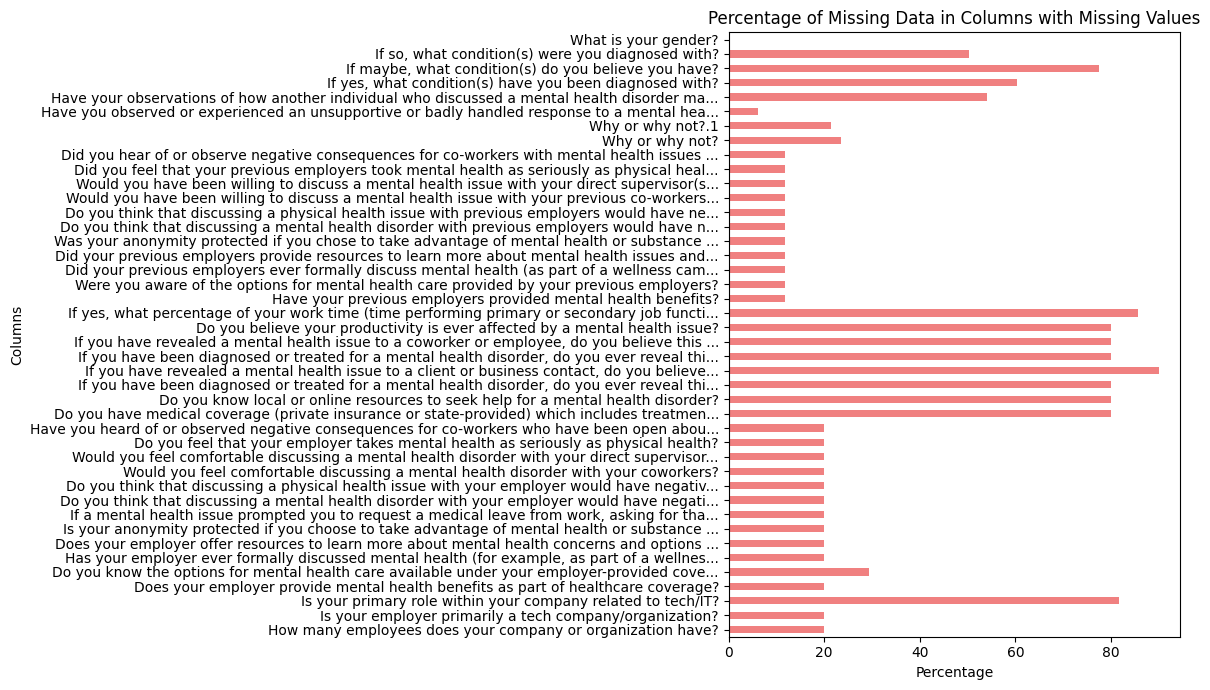

In [12]:

# Percentage of missing data per column
missing_data = data.isnull().mean() * 100
missing_data = missing_data[missing_data > 0]
max_length = 90
# Create a bigger figure
plt.figure(figsize=(12, 7))
# Function to abbreviate the column name and add "..." if it's too long
def abbreviate_column_name(col):
    if len(col) > max_length:
        return col[:max_length] + '...'  # Add "..." if the name exceeds max_length
    return col

# Apply the abbreviation function to each column name
short_column_names = {col: abbreviate_column_name(col) for col in missing_data.index}

# Rename the columns to their shortened versions
missing_data = missing_data.rename(short_column_names)
# Plot the data (horizontal bar chart)
missing_data.plot(kind='barh', color='lightcoral')

# Set the title and labels
plt.title('Percentage of Missing Data in Columns with Missing Values')
plt.xlabel('Percentage')
plt.ylabel('Columns')

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)  # No rotation needed for horizontal plot

# Display the plot
plt.tight_layout()
plt.show()


#### Handelling Missing Values with Remove

In [13]:
# List of columns where "Not Applicable" will be applied for self-employed individuals
columns_to_fill = [
    "Do you think that discussing a physical health issue with your employer would have negative consequences?",
    "Does your employer provide mental health benefits as part of healthcare coverage?",
    "Do you know the options for mental health care available under your employer-provided coverage?",
    "Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?",
    "Do you feel that your employer takes mental health as seriously as physical health?",
    "Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?",
    "Would you have been willing to discuss a mental health issue with your direct supervisor(s)?",
    "Would you feel comfortable discussing a mental health disorder with your coworkers?",
    "Do you think that discussing a mental health disorder with your employer would have negative consequences?",
    "If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
    "Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?",
    "Does your employer offer resources to learn more about mental health concerns and options for seeking help?",
    "Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
    "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
]

# Update missing values for self-employed individuals
# For all columns in `columns_to_fill`, set missing values (NaN) to "Not Applicable" if the individual is self-employed.
for col in columns_to_fill:
    data.loc[(data["Are you self-employed?"] == 1) & (data[col].isna()), col] = "Not_Applicable"



In [14]:
# List of columns related to previous employers
previous_employer_columns = [
    "Have your previous employers provided mental health benefits?",
    "Were you aware of the options for mental health care provided by your previous employers?",
    "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?",
    "Did your previous employers provide resources to learn more about mental health issues and how to seek help?",
    "Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?",
    "Do you think that discussing a mental health disorder with previous employers would have negative consequences?",
    "Do you think that discussing a physical health issue with previous employers would have negative consequences?",
    "Would you have been willing to discuss a mental health issue with your previous co-workers?",
    "Did you feel that your previous employers took mental health as seriously as physical health?",
    "Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?"

]

# Update missing values for individuals without previous employers
# For all columns in `previous_employer_columns`, set missing values (NaN) to "Not Applicable"
# if the individual does not have previous employers.
for col in previous_employer_columns:
    data.loc[(data["Do you have previous employers?"] == 0) & (data[col].isna()), col] = "Not_Applicable"

In [15]:
# Check for missing values in the entire dataset again
missing_percentage = data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False)


,0
"If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?",89.951151
"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",85.764131
Is your primary role within your company related to tech/IT?,81.646895
Do you believe your productivity is ever affected by a mental health issue?,79.972087
Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,79.972087
Do you know local or online resources to seek help for a mental health disorder?,79.972087
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",79.972087
"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",79.972087
"If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",79.972087
"If maybe, what condition(s) do you believe you have?",77.529658


In [16]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().mean() * 100

# Identify columns with more than 79% missing values
columns_to_drop = missing_percentage[missing_percentage > 79].index.tolist()

# Print the number of columns to be dropped
print(f"Number of columns with more than 79% missing values: {len(columns_to_drop)}")

# Drop the identified columns from the DataFrame
data = data.drop(columns=columns_to_drop)

Number of columns with more than 79% missing values: 9


In [17]:
# Define the columns to drop
columns_to_drop = ["Why or why not?", "Why or why not?.1","Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"]

# Drop the specified columns from the dataset because they contain many missing values
# and do not provide useful or quality information for the analysis.
data.drop(columns=columns_to_drop, inplace=True)

### Column-Wise Data Cleaning and Feature Engineering


#### What is your age?

##### Exploration

In [18]:
# Explore the column
print(data['What is your age?'].describe())


count    1433.000000
mean       34.286113
std        11.290931
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: What is your age?, dtype: float64


In [19]:
data['What is your age?'].value_counts().sort_values()

,count
What is your age?,
70,1
66,1
74,1
65,1
15,1
99,1
3,1
58,1
62,1


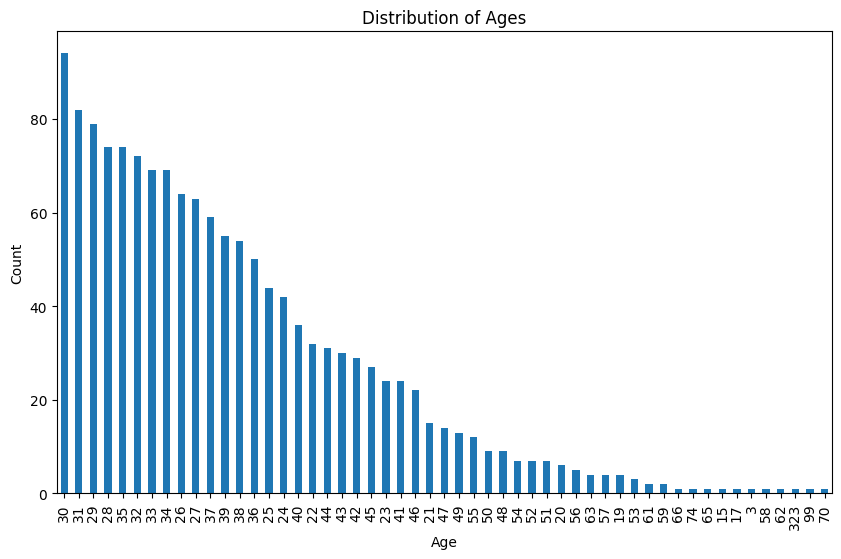

In [20]:
plt.figure(figsize=(10, 6))  # تغییر اندازه نمودار
data['What is your age?'].value_counts().plot(kind='bar')
plt.title("Distribution of Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


##### Cleaning and Preprocessing

In [21]:
# Filter out invalid age values: keep only ages between 15 and 98 (inclusive lower, exclusive upper)
data = data[data['What is your age?'] >= 15]
data = data[data['What is your age?'] < 99]

# Convert the age column to numeric, coercing invalid values to NaN
data['What is your age?'] = pd.to_numeric(data['What is your age?'], errors='coerce')

# Display summary statistics for the age column
print(data['What is your age?'].describe())


count    1430.000000
mean       34.060839
std         8.108938
min        15.000000
25%        28.000000
50%        33.000000
75%        38.750000
max        74.000000
Name: What is your age?, dtype: float64


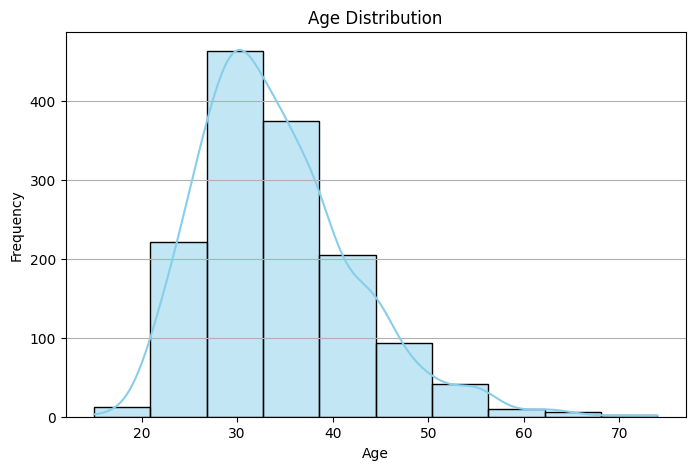

In [22]:
# Plot a histogram for the age distribution
plt.figure(figsize=(8, 5))  # Set the figure size
sns.histplot(data['What is your age?'], bins=10, kde=True, color='skyblue')  # Plot histogram with KDE
plt.title('Age Distribution')  # Set the title of the plot
plt.xlabel('Age')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(axis='y')  # Add gridlines to the y-axis for better readability
plt.show()  # Display the plot


In [23]:
# Rename 'What is your age?' to 'Age' for simplicity
data['Age']=data['What is your age?']

#### Are you self-employed?


##### Exploration

In [24]:
data['Are you self-employed?'].value_counts()

,count
Are you self-employed?,
0,1143
1,287


##### Cleaning and Preprocessing

In [25]:
# Rename 'Are you self-employed?' to 'self-employed?' for simplicity
data['self-employed?'] = data['Are you self-employed?']

#### Do you have previous employers?

##### Exploration

In [26]:
data['Do you have previous employers?'].value_counts()

,count
Do you have previous employers?,
1,1261
0,169


#### How many employees does your company or organization have?


##### Exploration

In [27]:
# Get the count of unique values in the 'How many employees does your company or organization have?' column
data['How many employees does your company or organization have?'].value_counts()

,count
How many employees does your company or organization have?,
26-100,292
More than 1000,255
100-500,247
6-25,209
500-1000,80
1-5,60


In [28]:
# Create a new column 'Is Missing' that indicates whether the 'How many employees does your company or organization have?' column is missing (True/False)
data['Is Missing'] = data['How many employees does your company or organization have?'].isnull()

# Calculate the correlation between the 'Are you self-employed?' column and the 'Is Missing' column (converted to integer)
correlation = data['Are you self-employed?'].corr(data['Is Missing'].astype(int))

# Print the correlation value
print(f"Correlation: {correlation}")


Correlation: 1.0


##### Cleaning and Preprocessing

######Handling Missing Values

In [29]:
# Fill missing values in the 'How many employees does your company or organization have?' column
# with '1-5' for rows where the person is self-employed (Are you self-employed? == 1)
data.loc[(data["Are you self-employed?"] == 1) & (data["How many employees does your company or organization have?"].isna()), "How many employees does your company or organization have?"] = '1-5'


######Feature Engineering

In [30]:
# Define the mapping for employee size categories to numerical labels
employee_size_mapping = {
    "1-5": 1,            # Small companies (1-5 employees)
    "6-25": 2,           # Small to medium companies (6-25 employees)
    "26-100": 3,         # Medium companies (26-100 employees)
    "100-500": 4,        # Medium to large companies (100-500 employees)
    "500-1000": 5,       # Large companies (500-1000 employees)
    "More than 1000": 6  # Very large companies (More than 1000 employees)
}

# Apply the mapping to the 'How many employees does your company or organization have?' column
# and create a new column 'Employee_Size_Labeled' with the numerical values
data['Employee_Size_Labeled'] = data['How many employees does your company or organization have?'].map(employee_size_mapping)


#### Is your employer primarily a tech company/organization?

##### Exploration

In [31]:

data['Is Missing'] = data['Is your employer primarily a tech company/organization?'].isnull()
correlation = data['Are you self-employed?'].corr(data['Is Missing'].astype(int))

print(f"Correlation: {correlation}")

Correlation: 1.0


In [32]:
missing_count =data["Is your employer primarily a tech company/organization?"].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 287


##### Cleaning and Preprocessing

In [33]:
# Fill missing values in the 'Is your employer primarily a tech company/organization?' column
# with -1 for rows where the person is self-employed (Are you self-employed? == 1)
data.loc[(data["Are you self-employed?"] == 1) &
         (data['Is your employer primarily a tech company/organization?'].isnull()),
         'Is your employer primarily a tech company/organization?'] = -1

In [34]:
# Check the distribution of values in the 'Is your employer primarily a tech company/organization?' column
data['Is your employer primarily a tech company/organization?'].value_counts()

,count
Is your employer primarily a tech company/organization?,
1.0,880
-1.0,287
0.0,263


In [35]:
# Create a new column 'Is_Tech_Employer' that copies the 'Is your employer primarily a tech company/organization?' column
data['Is_Tech_Employer']=data["Is your employer primarily a tech company/organization?"]

#### Which of the following best describes your work position?

##### Exploration

In [36]:
data['Which of the following best describes your work position?'].value_counts()

,count
Which of the following best describes your work position?,
Back-end Developer,261
Front-end Developer,125
Other,112
Supervisor/Team Lead,67
Back-end Developer|Front-end Developer,61
...,...
Front-end Developer|Back-end Developer|Support|Dev Evangelist/Advocate,1
Front-end Developer|Back-end Developer|Support|DevOps/SysAdmin|Dev Evangelist/Advocate,1
Other|Dev Evangelist/Advocate|DevOps/SysAdmin|Support|Back-end Developer|Front-end Developer|One-person shop,1


##### Cleaning and Preprocessing

In [37]:
# Create a new column 'Work_Posision' by copying the values from the 'Which of the following best describes your work position?' column
data['Work_Posision']=data['Which of the following best describes your work position?']

In [38]:
# Define a mapping of work positions to standardized categories
work_position_map = {
    'Back-end Developer': 'Back-end Developer',
    'Front-end Developer': 'Front-end Developer',
    'Supervisor/Team Lead': 'Supervisor/Team Lead',
    'Dev Evangelist/Advocate': 'Dev Evangelist/Advocate',
    'Support': 'Support'
}

# Function to map work positions to standardized categories, handling cases where the position is not in the predefined map
def map_work_positions(positions):
  # If there is no position provided, return 'Other'
    if not positions:
        return 'Other'

    # Create a set to store matched positions (to remove duplicates)
    matched_positions = set()

    # Split the string of positions by '|' and process each one
    for position in positions.split('|'):
        position = position.strip() # Remove leading/trailing whitespace
        # Add the corresponding standardized position, or 'Other' if it's not in the mapping
        matched_positions.add(work_position_map.get(position, 'Other'))

    # Return the standardized positions, joined by '|', or 'Other' if no matches were found
    return '|'.join(matched_positions) if matched_positions else 'Other'

# Apply the function to the 'Work_Posision' column to create a new 'work_position_category' column
data['work_position_category'] = data['Work_Posision'].apply(map_work_positions)

# Drop rows where 'work_position_category' is missing (NaN)
data = data.dropna(subset=['work_position_category'])

# Create dummy variables for each unique work position category
dummies = data['work_position_category'].str.get_dummies(sep='|')

# Rename the columns of the dummy variables to reflect the work position categories
dummies.columns = [f'work_position_{col}' for col in dummies.columns]


# Join the dummy variables back to the original DataFrame
data = data.join(dummies)

# Drop the 'work_position_category' column since we now have dummy variables
data.drop(columns=['work_position_category'], inplace=True)

#### Do you work remotely?

##### Exploration

In [39]:
# Check the distribution of values in the 'Do you work remotely?' column
data['Do you work remotely?'].value_counts()


,count
Do you work remotely?,
Sometimes,754
Always,343
Never,333


##### Cleaning and Preprocessing

In [40]:
# Define the mapping for remote work levels
Remote_Work_Level_mapping = {
    'Always': 2,       # Full remote work
    'Sometimes': 1,    # Partial remote work
    'Never': 0         # No remote work
}

# Apply the mapping to the 'Do you work remotely?' column
data['Remote_Work_Level'] = data['Do you work remotely?'].map(Remote_Work_Level_mapping)


#### What is your gender?

##### Exploration

In [41]:
# Check the distribution of values in the 'What is your gender?' column
data['What is your gender?'].value_counts()

,count
What is your gender?,
Male,608
male,249
Female,153
female,95
M,86
...,...
Human,1
Genderfluid,1
Enby,1


In [42]:
# Count the number of missing (NaN) values in the 'What is your gender?' column
missing_count = data['What is your gender?'].isnull().sum()

# Print the count of missing values
print(f'missing_count: {missing_count}')


missing_count: 3


##### Cleaning and Preprocessing

###### Column Renaming and Organization

In [43]:
# Convert all values in the 'What is your gender?' column to lowercase
data['What is your gender?'] = data['What is your gender?'].str.lower()

In [44]:

def clean_gender(gender):
    # Normalize input: trim whitespace and convert to lowercase
    gender = gender.strip().lower() if isinstance(gender, str) else gender

    # category "Male"
    if gender in ['m', 'male', 'man', 'cis male', 'cis man', 'male-bodied', 'male.',
                  'cisdude', 'mail','male (cis)','male','dude','sex is male','malr','m|','i\'m a man why didn\'t you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?','male (trans, ftm)', 'male/genderqueer']:
        return "Male"

    # category "Female"
    elif gender in ['f', 'fm', 'female','female/woman','woman', 'fem', 'cisgender female',
                    'female-bodied', 'cis female', 'female assigned at birth',
                    'i identify as female.', 'cis-woman', 'mtf','female (props for making this a freeform field, though)',
                    'transitioned, m2f', 'transgender woman',
                    'genderqueer woman', 'female or multi-gender femme']:
        return "Female"

    # category "Non-binary/Other"
    elif gender in ['non-binary','nonbinary', 'genderqueer', 'agender', 'genderfluid',
                    'bigender', 'queer', 'afab', 'unicorn', 'enby',
                    'transgender', 'flux', 'androgynous', 'nb','female-bodied; no feelings about gender',
                    'fluid', 'genderflux demi-girl', 'nb masculine',
                    'other/transfeminine', 'genderfluid (born female)','other']:
        return "Non-binary/Other"

    # category "Undisclosed"
    elif gender in ['none of your business', 'not specified', 'undisclosed', 'human','male 9:1 female, roughly']:
        return "Undisclosed"


    else:
         return "Undisclosed"

# Apply the function to clean the gender data
data['Gender'] = data['What is your gender?'].apply(clean_gender)

# Print the distribution of the cleaned 'Gender' data
print(data['Gender'].value_counts())


Gender
Male                1057
Female               343
Non-binary/Other      23
Undisclosed            7
Name: count, dtype: int64


In [45]:
# Combine 'Undisclosed' with 'Non-binary/Other'
data["Gender"] = data["Gender"].str.strip().replace({
    'Undisclosed': 'Non-binary/Other'
})

# Check the updated counts
print(data['Gender'].value_counts())


Gender
Male                1057
Female               343
Non-binary/Other      30
Name: count, dtype: int64


**Explanation:**
This step merges the "Undisclosed" category with "Non-binary/Other" to make the gender categorization more inclusive and appropriate for analysis. After making this change, we print the updated value counts to confirm the transformation

######Feature Engineering

In [46]:
# Applying One-Hot Encoding to the 'Cleaned Gender' column
gender_dummies = pd.get_dummies(data['Gender'], prefix='Gender')

# Joining the one-hot encoded columns back to the original DataFrame
data = data.join(gender_dummies)

# Optionally, drop the original 'Cleaned Gender' column if it's no longer needed
data.drop('Gender', axis=1, inplace=True)


#### What country do you live in?

##### Cleaning and Preprocessing

###### Column Renaming and Organization

In [47]:
# Create a list of countries you want to keep separate
specific_countries = [
    'United States of America',
    'United Kingdom',
    'Canada'

]

# Replace all other countries with 'Other Country'
data['What country do you live in?'] = data['What country do you live in?'].apply(
    lambda x: x if x in specific_countries else 'Other Country'
)
# Check the value counts after modification
data['What country do you live in?'].value_counts()

,count
What country do you live in?,
United States of America,838
Other Country,335
United Kingdom,180
Canada,77


###### Feature Engineering

In [48]:

# One-hot encode the 'What country do you live in?' column
data = pd.get_dummies(data, columns=['What country do you live in?'], prefix='Live_Country')

####What country do you Work in?

##### Cleaning and Preprocessing

######Column Renaming and Organization

In [49]:
# Create a list of countries you want to keep separate
specific_countries = [
    'United States of America',
    'United Kingdom',
    'Canada'
]

# Replace all other countries with 'Other Country'
data['What country do you work in?'] = data['What country do you work in?'].apply(
    lambda x: x if x in specific_countries else 'Other Country'
)


######Feature Engineering

In [50]:
# One-hot encode the 'What country do you live in?' column
data = pd.get_dummies(data, columns=['What country do you work in?'], prefix='Work_Country')

#### Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

##### Exploration

In [51]:
# Check the distribution of values in the 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' column
data['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].value_counts()

,count
"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",
No,812
Not_Applicable,287
Yes,229
I don't know,102


##### Cleaning Data and Preprocessing

In [52]:
#Column Renaming and Labeling
# Define the mapping
labeling_mapping = {

    'Yes': 2,
    'I don\'t know': 1,
    'No': 0,
    'Not_Applicable':-1

}
# Apply the mapping to the 'Has your employer ever formally discussed mental health' column
data['employer_formally_discussed_mh']=data['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']=data['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?']=data['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'].map(labeling_mapping)

In [53]:
# Check the distribution of values in the 'employer_formally_discussed_mh' column
data['employer_formally_discussed_mh'].value_counts()

,count
employer_formally_discussed_mh,
0,812
-1,287
2,229
1,102


#### Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?

##### Exploration

In [54]:
# Check the distribution of values in the "Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?" column
data["Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?"].value_counts()

,count
Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,
None did,887
Some did,255
Not_Applicable,169
I don't know,86
"Yes, they all did",33


In [55]:
missing_count =data['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [56]:
# Column Renaming and Feature Engineering
# Define the mapping for previous employers' mental health discussion responses

labeling_mapping = {

    'I don\'t know': 1,
    'None did': 0,
    'Yes, they all did':3 ,
    'Some did': 2,
    'Not_Applicable':-1

}

# Apply the mapping to the relevant column
data['previous_employers_formally_discuss_mh']=data['Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?'].map(labeling_mapping)


#### Do you have a family history of mental illness?

##### Exploration

In [57]:
# Check the distribution of values in the 'Do you have a family history of mental illness?' column
data['Do you have a family history of mental illness?'].value_counts()

,count
Do you have a family history of mental illness?,
Yes,668
No,488
I don't know,274


##### Cleaning and Preprocessing

In [58]:
#Column Renaming and Feature Engineering
# Define the mapping for family history of mental illness
Family_History_Mental_Illness_mapping = {
    "Yes": 2,
    "No": 0,
    'I don\'t know': 1,

}

# Apply the mapping to the 'Do you have a family history of mental illness?' column
data['Family_History_Mental_Illness_labeled']=data['Do you have a family history of mental illness?'].map(Family_History_Mental_Illness_mapping)

#### Have you had a mental health disorder in the past?

##### Exploration

In [59]:
missing_count =data['Have you had a mental health disorder in the past?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


In [60]:
# Check the distribution of values in the 'Have you had a mental health disorder in the past?' column
data['Have you had a mental health disorder in the past?'].value_counts()

,count
Have you had a mental health disorder in the past?,
Yes,734
No,450
Maybe,246


##### Cleaning and Preprocessing

In [61]:
#Column Renaming and Feature Engineering
# Define the mapping for past mental health disorder responses
Past_MH_Disorder_mapping = {
    "Yes": 2,
    "No": 0,
    'Maybe': 1,
}

# Apply the mapping to the relevant column
data['Past_MH_Disorder_labeled'] = data['Have you had a mental health disorder in the past?'].map(Past_MH_Disorder_mapping)


#### Do you currently have a mental health disorder?

##### Exploration

In [62]:
# Check the distribution of values in the 'Do you currently have a mental health disorder?' column
data['Do you currently have a mental health disorder?'].value_counts()

,count
Do you currently have a mental health disorder?,
Yes,574
No,530
Maybe,326


In [63]:
# Count the number of missing values in the 'Do you currently have a mental health disorder?' column
missing_count = data['Do you currently have a mental health disorder?'].isnull().sum()

# Print the missing value count
print(f'missing_count: {missing_count}')


missing_count: 0


##### Cleaning and Preprocessing

In [64]:
#Column Renaming and Feature Engineering
# Define the mapping for current mental health disorder responses
Currently_MH_Disorder_mapping = {
    "Yes": 2,
    "No": 0,
    'Maybe': 1,

}
# Apply the mapping to the relevant column
data['Currently_MH_Disorder_labeled']=data['Do you currently have a mental health disorder?'].map(Currently_MH_Disorder_mapping)

#### If yes, what condition(s) have you been diagnosed with?

##### Cleaning and Preprocessing

###### Handling Missing Values

In [65]:
# If a respondent has no current mental health disorder and has no diagnosis recorded,
# set the 'If yes, what condition(s) have you been diagnosed with?' column to "No_Disorder"
data.loc[(data["Do you currently have a mental health disorder?"] == 'No') &
         (data["If yes, what condition(s) have you been diagnosed with?"].isnull()),
         "If yes, what condition(s) have you been diagnosed with?"] = "No_Disorder"

In [66]:
# Count the missing values in the 'If yes, what condition(s) have you been diagnosed with?' column
missing_count =data["If yes, what condition(s) have you been diagnosed with?"].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 333


In [67]:
# If a respondent has a 'Maybe' response about their current mental health disorder and no diagnosis recorded,
# fill the diagnosis column with the value from 'If maybe, what condition(s) do you believe you have?'
data.loc[(data["Do you currently have a mental health disorder?"] == 'Maybe') &
         (data["If yes, what condition(s) have you been diagnosed with?"].isnull()),
         "If yes, what condition(s) have you been diagnosed with?"] = data["If maybe, what condition(s) do you believe you have?"]

In [68]:
# Count the missing values again after the filling process
missing_count =data["If yes, what condition(s) have you been diagnosed with?"].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 12


In [69]:
# Display the value counts for the 'If yes, what condition(s) have you been diagnosed with?' column
data['If yes, what condition(s) have you been diagnosed with?'].value_counts()

,count
"If yes, what condition(s) have you been diagnosed with?",
No_Disorder,530
"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",166
"Mood Disorder (Depression, Bipolar Disorder, etc)",157
"Anxiety Disorder (Generalized, Social, Phobia, etc)",81
"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder",36
...,...
"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder|Personality Disorder (Borderline, Antisocial, Paranoid, etc)|Obsessive-Compulsive Disorder|Post-traumatic Stress Disorder",1
"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Eating Disorder (Anorexia, Bulimia, etc)|Attention Deficit Hyperactivity Disorder",1
"Mood Disorder (Depression, Bipolar Disorder, etc)|Personality Disorder (Borderline, Antisocial, Paranoid, etc)|Addictive Disorder",1


In [70]:


# Extract and count the disorders diagnosed by respondents

diagnosed_data = data['If yes, what condition(s) have you been diagnosed with?']

# Initialize a Counter to store the disorder counts
disorder_counts = Counter()

# Iterate through each non-null response, split by '|', and count the occurrences of each disorder
for entry in diagnosed_data.dropna():
    disorders = entry.split("|")
    for disorder in disorders:
        disorder_counts[disorder.strip()] += 1

# Sort and display the most common disorders
sorted_disorders = disorder_counts.most_common()

# Print the disorders in order of their frequency
print("The most disorder in order:")
for disorder, count in sorted_disorders:
    print(f"{disorder}: {count}")


The most disorder in order:
Mood Disorder (Depression, Bipolar Disorder, etc): 631
Anxiety Disorder (Generalized, Social, Phobia, etc): 536
No_Disorder: 530
Attention Deficit Hyperactivity Disorder: 179
Post-traumatic Stress Disorder: 95
Stress Response Syndromes: 78
Personality Disorder (Borderline, Antisocial, Paranoid, etc): 77
Obsessive-Compulsive Disorder: 75
Addictive Disorder: 59
Substance Use Disorder: 55
Eating Disorder (Anorexia, Bulimia, etc): 38
Dissociative Disorder: 17
Psychotic Disorder (Schizophrenia, Schizoaffective, etc): 14
Autism: 4
Pervasive Developmental Disorder (Not Otherwise Specified): 1
Seasonal Affective Disorder: 1
Burn out: 1
PDD-NOS: 1
Suicidal Ideation: 1
We're all hurt, right?!: 1
Burnout: 1
Gender Identity Disorder: 1
Tinnitus: 1
Depression: 1
Autism (Asperger's): 1
Gender Dysphoria: 1
Asperges: 1
PTSD (undiagnosed): 1
Depersonalisation: 1
post-partum / anxiety: 1
Sexual addiction: 1
Combination of physical impairment (strongly near-sighted) with a pos

In [71]:
# Fill missing values in the "If yes, what condition(s) have you been diagnosed with?" column
# with the default value "Mood Disorder (Depression, Bipolar Disorder, etc)"
data["If yes, what condition(s) have you been diagnosed with?"] = data["If yes, what condition(s) have you been diagnosed with?"].fillna("Mood Disorder (Depression, Bipolar Disorder, etc)")

###### Column Renaming and Feature Engineering

In [72]:
# Create a new column 'Type of currently mental health disorders' with the same data as the column "If yes, what condition(s) have you been diagnosed with?"
data['Type of currently mental health disorders']=data["If yes, what condition(s) have you been diagnosed with?"]

In [73]:
# Creating a dictionary for partial matching of each category
category_map = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety Disorder',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Attention Deficit Hyperactivity Disorder': 'ADHD'

}

# Function to map each diagnosis to the main category
def map_conditions(conditions):
    if conditions in ['No_Disorder']:
        return 'No disorder'

    mapped_categories = set()  # To avoid duplicate categories
    # Split the conditions by '|'
    for condition in conditions.split('|'):
        condition = condition.strip()  # Remove any leading/trailing whitespace
        found = False
        # Check for partial matches in the category_map
        for key in category_map:
            if key in condition:
                mapped_categories.add(category_map[key])
                found = True
        # If no matches found, add 'Other'
        if not found:
            mapped_categories.add('Other')

    return '|'.join(mapped_categories) if mapped_categories else 'Other'

# Apply mapping to diagnosis column
data['diagnosis_category'] = data['Type of currently mental health disorders'].apply(map_conditions)

# Drop rows with missing diagnosis categories
data = data.dropna(subset=['diagnosis_category'])

# One-Hot Encoding for diagnosis categories

dummies = data['diagnosis_category'].str.get_dummies(sep='|')
dummies.columns = [f'Type of currently mental health disorders_{col}' for col in dummies.columns]

# Joining the dummies to the original DataFrame
data = data.join(dummies)

#drop the original column if it's no longer needed
data.drop('Type of currently mental health disorders', axis=1, inplace=True)



In [74]:
# Dropping the 'diagnosis_category' column
data.drop(columns=['diagnosis_category'], inplace=True)

#### Have you been diagnosed with a mental health condition by a medical professional?

##### Exploration

In [75]:
missing_count =data['Have you been diagnosed with a mental health condition by a medical professional?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


In [76]:
# Check the distribution of values in the 'Have you been diagnosed with a mental health condition by a medical professional?' column
data['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts()

,count
Have you been diagnosed with a mental health condition by a medical professional?,
No,716
Yes,714


In [77]:
print(data['Have you been diagnosed with a mental health condition by a medical professional?'].value_counts(dropna=False))


Have you been diagnosed with a mental health condition by a medical professional?
No     716
Yes    714
Name: count, dtype: int64


##### Cleaning and Preprocessing

In [78]:
#Column Renaming and Labeling
data['diagnosed_mh_by_a_medical_professional?'] = data['Have you been diagnosed with a mental health condition by a medical professional?'].map({'Yes': 1, 'No': 0})

In [79]:
data['diagnosed_mh_by_a_medical_professional?'].value_counts()

,count
diagnosed_mh_by_a_medical_professional?,
0,716
1,714


#### If so, what condition(s) were you diagnosed with?

##### Exploration

In [80]:
data['If so, what condition(s) were you diagnosed with?'].value_counts()

,count
"If so, what condition(s) were you diagnosed with?",
"Mood Disorder (Depression, Bipolar Disorder, etc)",187
"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)",150
"Anxiety Disorder (Generalized, Social, Phobia, etc)",63
"Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder",33
"Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder",29
...,...
"Stress Response Syndromes|Mood Disorder (Depression, Bipolar Disorder, etc)",1
Substance Use Disorder|Addictive Disorder,1
"Mood Disorder (Depression, Bipolar Disorder, etc)|Suicidal Ideation",1


##### Cleaning and Preprocessing

In [81]:
#Handling Missing Values
data.loc[(data['Have you been diagnosed with a mental health condition by a medical professional?'] == "No") &
         (data['If so, what condition(s) were you diagnosed with?'].isnull()),
         'If so, what condition(s) were you diagnosed with?'] = "No_Diagnosis"

In [82]:
missing_count =data['If so, what condition(s) were you diagnosed with?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 5


In [83]:
# Select the column containing diagnosed mental health conditions
diagnosed_data = data['If so, what condition(s) were you diagnosed with?']

# Initialize a Counter object to track the frequency of each condition
disorder_counts = Counter()


# Iterate over each entry in the column, ignoring missing values
for entry in diagnosed_data.dropna():
  # Split multiple conditions separated by '|'
    disorders = entry.split("|")
    for disorder in disorders:
      # Increment the count for each condition, stripping whitespace
        disorder_counts[disorder.strip()] += 1


# Sort the disorders by frequency in descending order
sorted_disorders = disorder_counts.most_common()

# Display the most frequently reported conditions
print("The most disorder in order")
for disorder, count in sorted_disorders:
    print(f"{disorder}: {count}")


The most disorder in order
No_Diagnosis: 716
Mood Disorder (Depression, Bipolar Disorder, etc): 525
Anxiety Disorder (Generalized, Social, Phobia, etc): 371
Attention Deficit Hyperactivity Disorder: 133
Post-traumatic Stress Disorder: 69
Obsessive-Compulsive Disorder: 40
Stress Response Syndromes: 31
Personality Disorder (Borderline, Antisocial, Paranoid, etc): 28
Substance Use Disorder: 26
Eating Disorder (Anorexia, Bulimia, etc): 18
Addictive Disorder: 15
Dissociative Disorder: 10
Psychotic Disorder (Schizophrenia, Schizoaffective, etc): 8
Depression: 3
Autism: 2
PDD-NOS (see above): 1
Seasonal Affective Disorder: 1
Burn out: 1
PDD-NOS: 1
Suicidal Ideation: 1
Gender Identity Disorder: 1
Autism (Asperger's): 1
Gender Dysphoria: 1
Autism - while not a "mental illness", still greatly affects how I handle anxiety: 1
Attention Deficit Disorder: 1
MCD (when it was diagnosed, the ultra-mega "disorder" ADHD didn't exist yet): 1
posttraumatic stress disourder: 1
attention deficit disorder (bu

In [84]:
# Fill missing values in the column 'If so, what condition(s) were you diagnosed with?'
# with the default value 'Mood Disorder (Depression, Bipolar Disorder, etc)'
# This ensures that rows with NaN values are assigned a default diagnosis,
# which might be the most common or representative condition based on the dataset's context.
data['If so, what condition(s) were you diagnosed with?']= data['If so, what condition(s) were you diagnosed with?'].fillna('Mood Disorder (Depression, Bipolar Disorder, etc)')

In [85]:
# Rename column for clarity on medically diagnosed disorders
data['Type of mental health disorders by a medical professional?']=data['If so, what condition(s) were you diagnosed with?']

In [86]:
# Creating a dictionary for partial matching of each category
category_map = {
    'Anxiety Disorder (Generalized, Social, Phobia, etc)': 'Anxiety Disorder',
    'Mood Disorder (Depression, Bipolar Disorder, etc)': 'Mood Disorder',
    'Attention Deficit Hyperactivity Disorder': 'ADHD'

}

# Function to map each diagnosis to the main category
def map_conditions(conditions):
    if conditions in ['No_Diagnosis']:
        return 'No_Diagnosis'


    mapped_categories = set()  # To avoid duplicate categories
    # Split the conditions by '|'
    for condition in conditions.split('|'):
        condition = condition.strip()  # Remove any leading/trailing whitespace
        found = False
        # Check for partial matches in the category_map
        for key in category_map:
            if key in condition:
                mapped_categories.add(category_map[key])
                found = True
        # If no matches found, add 'Other'
        if not found:
            mapped_categories.add('Other')

    return '|'.join(mapped_categories) if mapped_categories else 'Other'

# Applying the mapping to the column in the DataFrame
data['diagnosis_category'] = data['Type of mental health disorders by a medical professional?'].apply(map_conditions)

# Dropping rows with None in 'diagnosis_category'
data = data.dropna(subset=['diagnosis_category'])


# Applying One-Hot Encoding to the diagnosis categories
dummies = data['diagnosis_category'].str.get_dummies(sep='|')

# Adding a prefix to the dummies DataFrame columns
dummies.columns = [f'Type of mental health disorders by a medical professional_{col}' for col in dummies.columns]

# Joining the dummies to the original DataFrame
data = data.join(dummies)

# drop the original column if it's no longer needed

data.drop('Type of mental health disorders by a medical professional?', axis=1, inplace=True)

In [87]:
#drop the original column if it's no longer needed
data.drop(columns=['diagnosis_category'], inplace=True)

#### Have you ever sought treatment for a mental health issue from a mental health professional?

##### Exploration

In [88]:
# Check the distribution of values in the 'Have you ever sought treatment for a mental health issue from a mental health professional?' column
data['Have you ever sought treatment for a mental health issue from a mental health professional?'].value_counts()

,count
Have you ever sought treatment for a mental health issue from a mental health professional?,
1,837
0,593


In [89]:
# Count the number of missing values in the column about seeking treatment from a mental health professional
missing_count =data['Have you ever sought treatment for a mental health issue from a mental health professional?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


#### Do you feel that being identified as a person with a mental health issue would hurt your career?

##### Exploration

In [90]:
# Check the distribution of values in the 'Do you feel that being identified as a person with a mental health issue would hurt your career?' column
data['Do you feel that being identified as a person with a mental health issue would hurt your career?'].value_counts()

,count
Do you feel that being identified as a person with a mental health issue would hurt your career?,
Maybe,585
"Yes, I think it would",563
"No, I don't think it would",147
"Yes, it has",105
"No, it has not",30


In [91]:
# Count the number of missing values in the column 'Do you feel that being identified as a person with a mental health issue would hurt your career?'
missing_count =data['Do you feel that being identified as a person with a mental health issue would hurt your career?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [92]:
# Column Renaming and Feature Engineering
# Define the mapping
labeling_mapping = {
    'Yes, I think it would': 2,  # Strong agreement that it would hurt
    'Maybe': 1,                  # Uncertainty about its impact
    'No, I don\'t think it would': 0,  # Agreement that it would not hurt
    'Yes, it has': 2,            # Confirmation that it already has hurt
    'No, it has not': 0          # Confirmation that it has not hurt
}
data['feeling_identified_you_with_mh_issue_hurt_career_score']=data['Do you feel that being identified as a person with a mental health issue would hurt your career?'].map(labeling_mapping)

#### Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?

##### Exploration

In [93]:
# Check the distribution of values in the 'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?' column
data['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].value_counts()

,count
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?,
Maybe,591
"Yes, I think they would",403
"No, I don't think they would",345
"No, they do not",49
"Yes, they do",42


##### Cleaning and Preprocessing

###### Column Renaming and Feature Engineering

In [94]:
# Define the mapping
labeling_mapping = {

    'Yes, I think they would': 2,      # Strong belief that co-workers would view negatively
    'Maybe': 1,                        # Uncertainty about whether co-workers would view negatively
    'No, I don\'t think they would': 0, # Belief that co-workers wouldn't view negatively
    'Yes, they do': 2,                 # Confirmation that co-workers already view negatively
    'No, they do not': 0               # Confirmation that co-workers do not view negatively

}
data['thinking_team members/co-workers_view_negatively_knew_about_your_mh_issue_score']=data['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?'].map(labeling_mapping)

#### Do you think that discussing a mental health disorder with your employer would have negative consequences?

##### Exploration


In [95]:
# Check the distribution of values in the 'Do you think that discussing a mental health disorder with your employer would have negative consequences?' column
data['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].value_counts()

,count
Do you think that discussing a mental health disorder with your employer would have negative consequences?,
Maybe,486
No,436
Not_Applicable,287
Yes,221


In [96]:
# Count the number of missing values in the column 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
missing_count =data['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [97]:
# Column Renaming and Feature Engineering
# Define the mapping
labeling_mapping = {
    "Yes": 2,
    "No": 0,
    'Maybe': 1,
    'Not_Applicable':-1

}
data['thinking_discussing_mh_disorder_with_employer_negative_consequences_score']=data['Do you think that discussing a mental health disorder with your employer would have negative consequences?'].map(labeling_mapping)

In [98]:
# Check the distribution of values in the 'thinking_discussing_mh_disorder_with_employer_negative_consequences_score' column
data['thinking_discussing_mh_disorder_with_employer_negative_consequences_score'].value_counts()

,count
thinking_discussing_mh_disorder_with_employer_negative_consequences_score,
1,486
0,436
-1,287
2,221


#### Do you think that discussing a mental health disorder with previous employers would have negative consequences?

##### Exploration

In [99]:
# Check the distribution of values in the 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?' column
data['Do you think that discussing a mental health disorder with previous employers would have negative consequences?'].value_counts()

,count
Do you think that discussing a mental health disorder with previous employers would have negative consequences?,
Some of them,614
I don't know,309
"Yes, all of them",225
Not_Applicable,169
None of them,113


In [100]:
# Count the number of missing values in the column 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?'
missing_count =data['Do you think that discussing a mental health disorder with previous employers would have negative consequences?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [101]:
# Column Renaming and Feature Engineering
# Define the mapping
labeling_mapping = {
    'Some of them': 2,
    'Yes, all of them': 3,
    "I don't know": 1,
    'None of them': 0,
    'Not_Applicable':-1

}
data['thinking_discussing_mh_disorder_with_previous_employers_negative_consequences_score']=data['Do you think that discussing a mental health disorder with previous employers would have negative consequences?'].map(labeling_mapping)

In [102]:
# Count the number of missing values in'thinking_discussing_mh_disorder_with_previous_employers_negative_consequences_score'
missing_count =data['thinking_discussing_mh_disorder_with_previous_employers_negative_consequences_score'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0



#### Do you know the options for mental health care available under your employer-provided coverage?

##### Exploration

In [103]:
# Check the distribution of values in the 'Do you know the options for mental health care available under your employer-provided coverage?' column
data['Do you know the options for mental health care available under your employer-provided coverage?'].value_counts()

,count
Do you know the options for mental health care available under your employer-provided coverage?,
No,352
I am not sure,351
Yes,307
Not_Applicable,287


In [104]:
# Count the number of missing values in the column'Do you know the options for mental health care available under your employer-provided coverage?'
missing_count =data['Do you know the options for mental health care available under your employer-provided coverage?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 133


##### Cleaning and Preprocessing

###### Handling Missing Values

In [105]:
# Replacing NaNs with 'I am not sure'
data['Do you know the options for mental health care available under your employer-provided coverage?'] = data['Do you know the options for mental health care available under your employer-provided coverage?'].fillna('I am not sure')


###### Column Renaming and Feature Engineering

In [106]:
# Define the mapping
labeling_mapping = {
    "Yes": 2,
    "No": 0,
    'I am not sure': 1,
    'Not_Applicable':-1

}

data['Aware_of_mh_care_employer-provided_coverage']=data['Do you know the options for mental health care available under your employer-provided coverage?'].map(labeling_mapping)

#### Does your employer provide mental health benefits as part of healthcare coverage?'

##### Exploration

In [107]:
# Count the number of missing values in the column 'Does your employer provide mental health benefits as part of healthcare coverage?'
missing_count =data['Does your employer provide mental health benefits as part of healthcare coverage?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


In [108]:
# Check the distribution of values in the 'Does your employer provide mental health benefits as part of healthcare coverage?'column
data['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()

,count
Does your employer provide mental health benefits as part of healthcare coverage?,
Yes,528
I don't know,319
Not_Applicable,287
No,213
Not eligible for coverage / N/A,83


##### Cleaning and Preprocessing

In [109]:
# Normalize and replace specific values in the column about employer-provided mental health benefits
data['Does your employer provide mental health benefits as part of healthcare coverage?']=data['Does your employer provide mental health benefits as part of healthcare coverage?'].str.strip().replace({
    'Not eligible for coverage / N/A': 'Not Eligible',
    'I don\'t know': 'Unaware'
})

###### Column Renaming and Feature Engineering

In [110]:
labeling_mapping = {
    "Yes": 2,                  # Access to mental health benefits
    "No": 0,                   # No access to such benefits
    "Not Eligible": 1,         # Program exists, but individual cannot access it
    "Unaware": 1,              # Unaware of the program's existence
    "Not_Applicable": -1       # Does not have an employer
}

data['Employer_provide_mh_benefits_as_part_of_healthcare_coverage?']=data['Does your employer provide mental health benefits as part of healthcare coverage?'].map(labeling_mapping)

#### Does your employer offer resources to learn more about mental health concerns and options for seeking help?

In [111]:
# Check the distribution of values in the 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?' column
data['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].value_counts()

,count
Does your employer offer resources to learn more about mental health concerns and options for seeking help?,
No,531
I don't know,318
Yes,294
Not_Applicable,287


##### Cleaning and Preprocessing

In [112]:
# Normalize and replace specific values in the column about employer resources for mental health
data['Does your employer offer resources to learn more about mental health concerns and options for seeking help?']=data['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].str.strip().replace({
    'I don\'t know': 'Unaware'
})

In [113]:
# Count the number of missing values in the column about employer resources for mental health
missing_count =data['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


###### Column Renaming and Feature Engineering

In [114]:
labeling_mapping = {
    "Yes": 2,                  # Access to mental health benefits
    "No": 0,                   # No access to such benefits
    "Unaware": 1,              # Unaware of the program's existence
    "Not_Applicable": -1       # Does not have an employer
}

data['Employer_offer_resources_mh_concerns_seeking_help']=data['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].map(labeling_mapping)

#### Did your previous employers provide resources to learn more about mental health issues and how to seek help?

##### Exploration

In [115]:
# Count the occurrences of each unique value in the column about previous employer resources for mental health
data['Did your previous employers provide resources to learn more about mental health issues and how to seek help?'].value_counts()

,count
Did your previous employers provide resources to learn more about mental health issues and how to seek help?,
None did,840
Some did,370
Not_Applicable,169
"Yes, they all did",51


In [116]:
# Count the number of missing values in the column about previous employer resources for mental health
missing_count =data['Did your previous employers provide resources to learn more about mental health issues and how to seek help?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [117]:
labeling_mapping = {
    'None did': 0,
    'Yes, they all did': 2,
    'Some did': 1,
    'Not_Applicable': -1  # Convert 'Not_Applicable' to -1 for imputation
}

data['Experience_previous_employers_provided_resources_mh_issues_how_to_seek_help']=data['Did your previous employers provide resources to learn more about mental health issues and how to seek help?'].map(labeling_mapping)

#### Have your previous employers provided mental health benefits?

##### Exploration

In [118]:
# Check the distribution of values in the 'Have your previous employers provided mental health benefits?' column
data['Have your previous employers provided mental health benefits?'].value_counts()

,count
Have your previous employers provided mental health benefits?,
Some did,388
"No, none did",372
I don't know,313
"Yes, they all did",188
Not_Applicable,169


##### Cleaning and Preprocessing

In [119]:
labeling_mapping = {
    'No, none did': 0,
    'Yes, they all did': 3,
    'Some did': 2,
    'I don\'t know':1 ,
    'Not_Applicable': -1  # Convert 'Not_Applicable' to -1 for imputation
}

data['Experience_previous_employers_provided_mh_benefits']=data['Have your previous employers provided mental health benefits?'].map(labeling_mapping)

#### Were you aware of the options for mental health care provided by your previous employers?

##### Exploration

In [120]:
# Check the distribution of values in the 'Were you aware of the options for mental health care provided by your previous employers?' column
data['Were you aware of the options for mental health care provided by your previous employers?'].value_counts()

,count
Were you aware of the options for mental health care provided by your previous employers?,
N/A (not currently aware),580
I was aware of some,383
"Yes, I was aware of all of them",181
Not_Applicable,169
"No, I only became aware later",117


In [121]:
# Count the number of missing values in the column 'Were you aware of the options for mental health care provided by your previous employers?'
missing_count =data['Were you aware of the options for mental health care provided by your previous employers?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [122]:
#Column Renaming and Feature Engineering
labeling_mapping = {
    'Not_Applicable': -1,
    'N/A (not currently aware)': 0,
    'No, I only became aware later': 1,
    'I was aware of some': 2,
    'Yes, I was aware of all of them': 3
}

data['Aware_of_mh_care_previouse_employers_provided_coverage'] = data['Were you aware of the options for mental health care provided by your previous employers?'].map(labeling_mapping)


#### Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?

##### Exploration

In [123]:
# Check the distribution of values in the 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?' column
data['Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'].value_counts()

,count
Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,
None of them,757
Some of them,443
Not_Applicable,169
"Yes, all of them",61


In [124]:
# Count the number of missing values in the column 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'
missing_count =data['Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

###### Handling Missing Values

In [125]:
# Count the number of missing values in the column about previous employer resources for mental health
data.loc[(data["Do you have previous employers?"] == 0) &
         (data["Are you self-employed?"] == 1),
         "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"] = data["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"].fillna("Not_Applicable")


In [126]:
#Column Renaming and Feature Engineering
# Define the mapping
labeling_mapping = {
    'None of them': 0,
    'Yes, all of them': 2,
    'Some of them': 1,
    'Not_Applicable': -1  # Convert 'Not_Applicable' to -1 for imputation

}
data['observe_negative_consequences_-co-workers_with_mh_issues_previous_workplaces_level']=data['Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?'].map(labeling_mapping)

#### Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?

##### Exploration

In [127]:
# Check the distribution of values in the 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?' column
data['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].value_counts()

,count
Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,
No,567
Maybe/Not sure,344
"Yes, I observed",264
"Yes, I experienced",166
Not_Applicable,14


##### Cleaning and Preprocessing

###### Handling Missing Values

In [128]:
# Update missing values with "Not_Applicable" for self-employed individuals with no previous employers
data.loc[(data["Do you have previous employers?"] == 0) &
         (data["Are you self-employed?"] == 1),
         "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"] = data["Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?"].fillna("Not_Applicable")


In [129]:
# Count the number of missing values in the specified column
missing_count =data['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 75


In [130]:
# Replacing NaNs with 'No_Response'
data['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'] = data['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].fillna('No_Response')


In [131]:
data['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].value_counts()

,count
Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,
No,567
Maybe/Not sure,344
"Yes, I observed",264
"Yes, I experienced",166
No_Response,75
Not_Applicable,14


###### Column Renaming and Feature Engineering

In [132]:
# Define the mapping
labeling_mapping = {
    'No': 0,
    'Yes, I observed': 2,
    'Yes, I experienced': 3,
    'Maybe/Not sure': 1,
    'No_Response': 0 ,
    'Not_Applicable': -1  # Convert 'Not_Applicable' to -1 for imputation

}
data['observed_experienced_unsupportive_response_mh_issue-current_previous_workplace']=data['Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'].map(labeling_mapping)

#### - Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?

##### Exploration

In [133]:
# # Check the distribution of values in the 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?' column
# data['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'].value_counts()

In [134]:
# # Count the number of missing values in the specified column
# missing_count =data['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'].isnull().sum()
# print(f'missing_count: {missing_count}')


##### Cleaning and Preprocessing


###### Handling Missing Values

In [135]:
# # Replacing NaNs with 'No Response'
# data['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'] = data['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'].fillna('No_Response')


###### Column Renaming and Feature Engineering

In [136]:
# # Define the mapping
# labeling_mapping = {
#     'Yes': 2,
#     'Maybe': 1,
#     'No': 0,
#     'No_Response': 0 ,
#     'Not_Applicable': -1  # Convert 'Not_Applicable' to -1 for imputation

# }
# data['observations_another_individual_discussed_mh_disorder_made_you_less_likely_reveal_mh_issue_current_workplace']=data['Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?'].map(labeling_mapping)

#### Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?

##### Exploration

In [137]:
# Check the distribution of values in the 'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?' column
data['Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'].value_counts()

,count
Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,
No,1045
Not_Applicable,287
Yes,98


##### Cleaning and Preprocessing

In [138]:
# Define the mapping
labeling_mapping = {
    'Yes': 1,
    'No': 0,
    'Not_Applicable': -1



}
data['observed_negative_consequences_co-workers_open_mh_issues_workplace']=data['Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'].map(labeling_mapping)

In [139]:

data['observed_negative_consequences_co-workers_open_mh_issues_workplace'].value_counts()

,count
observed_negative_consequences_co-workers_open_mh_issues_workplace,
0,1045
-1,287
1,98


#### Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

In [140]:
# Check the distribution of values in the 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?' column
data['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].value_counts()

,count
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,
I don't know,740
Yes,319
Not_Applicable,287
No,84


In [141]:
missing_count =data['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [142]:
# Clean the column by stripping whitespace and replacing 'I don't know' with 'Unaware'.
data['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?']=data['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].str.strip().replace({
    'I don\'t know': 'Unaware'
})

In [143]:

label_mapping = {
    "No": 0,
    'Unaware': 1,
    "Yes": 2,
    "Not_Applicable": -1  # because correlation with Self-Employed 1
}

data['anonymity_protected_provided_by_employer_labeled'] = data['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?'].map(label_mapping)



#### Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?

##### Exploration

In [144]:
# Check the distribution of values in the 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'column
data['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].value_counts()

,count
Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,
I don't know,858
Not_Applicable,169
"Yes, always",164
No,120
Sometimes,119


In [145]:

# Count the missing values in the column 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?' and print the result.
missing_count =data['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [146]:
# Standardize values in the column
# 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'
# by trimming whitespace and replacing specific entries for consistency.
data['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'] = data['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].str.strip().replace({
   'Yes, always': 'Yes',       # Simplify 'Yes, always' to 'Yes'
   'I don\'t know': 'Unaware'  # Replace 'I don't know' with 'Unaware'
})


In [147]:

label_mapping = {
    "No": 0,
    'Unaware': 1,
    "Yes": 3,
    'Sometimes':2,
    "Not_Applicable": -1  # because have correlation with Previous employer -1
}


data['anonymity_protected_provided_by_previous_employers_labeled'] = data['Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'].map(label_mapping)



#### If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:

##### Exploration

In [148]:
# Check the distribution of values in the 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'column
data['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].value_counts()

,count
"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",
Not_Applicable,287
Somewhat easy,279
Very easy,220
Somewhat difficult,199
Neither easy nor difficult,178
I don't know,149
Very difficult,118


In [149]:
# Calculate and print the number of missing values in the column
missing_count =data['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [150]:
# Standardize values in the column by trimming whitespace and replacing specific entries for consistency
data['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:']=data['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].str.strip().replace({
    'I don\'t know': 'Unaware'  # Replace 'I don't know' with 'Unaware'
})

In [151]:
data['mh_leave_request_ease'] = data['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].replace({
    'Not_Applicable': 'Not_Applicable',
    'Somewhat easy': 'Somewhat easy',
    'Very easy': 'Very easy',
    'Somewhat difficult': 'Somewhat difficult',
    'Neither easy nor difficult': 'Neutral',
    'Unaware': 'Unaware',
    'Very difficult': 'Very difficult'
})

In [152]:
data['mh_leave_request_ease'].value_counts()

,count
mh_leave_request_ease,
Not_Applicable,287
Somewhat easy,279
Very easy,220
Somewhat difficult,199
Neutral,178
Unaware,149
Very difficult,118


In [153]:
# Calculate and print the number of missing values in the column
missing_count =data['mh_leave_request_ease'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


In [154]:
mapping = {
    'Very easy': 0,
    'Somewhat easy': 1,
    'Unaware': 2,
    'Neutral': 3,
    'Somewhat difficult': 4,
    'Very difficult': 5,
    'Not_Applicable': -1
}
data['mh_leave_request_ease_labeled'] = data['mh_leave_request_ease'].map(mapping)



In [155]:
# Calculate and print the number of missing values in the column
missing_count =data['mh_leave_request_ease_labeled'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


#### If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?

##### Exploration

In [156]:
# Check the distribution of values in the 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?' column
data['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].value_counts()

,count
"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?",
Not applicable to me,556
Sometimes,369
Rarely,320
Never,120
Often,65


##### Cleaning and Preprocessing

In [157]:
# Column Renaming and Feature Engineering
# Define the mapping
interference_map = {
    "Not applicable to me": -1,
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3
}
data['work_interference_when_treated_mh_labeled'] = data['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'].map(interference_map)

#### If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively

##### Exploration

In [158]:
# Check the distribution of values in the 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?' column
data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].value_counts()

,count
"If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",
Often,537
Not applicable to me,467
Sometimes,362
Rarely,52
Never,12


##### Cleaning and Preprocessing

In [159]:
# Column Renaming and Labeling
# Define the mapping
interference_map = {
    "Not applicable to me": -1,
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3
}
data['work_interference_when_NOT_treated_mh_labeled'] = data['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'].map(interference_map)

#### Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?

##### Exploration

In [160]:
# Check the distribution of values in the 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?' column
data['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts()

,count
Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,
Yes,426
Maybe,381
No,336
Not_Applicable,287


In [161]:
# Calculate and print the number of missing values in the column
missing_count =data['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [162]:
# Column Renaming and Labeling
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "Maybe": 1,
   "No": 0,
   'Yes':2
}
data['comfortable_discussing_mh_disorder_with_direct_supervisor(s)_level'] = data['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].map(category_order_map)


#### Would you feel comfortable discussing a mental health disorder with your coworkers?

##### Exploration

In [163]:
# Check the distribution of values in the 'Would you feel comfortable discussing a mental health disorder with your coworkers?' column

data['Would you feel comfortable discussing a mental health disorder with your coworkers?'].value_counts()

,count
Would you feel comfortable discussing a mental health disorder with your coworkers?,
Maybe,477
No,392
Not_Applicable,287
Yes,274


In [164]:
# Calculate and print the number of missing values in the column
missing_count =data['Would you feel comfortable discussing a mental health disorder with your coworkers?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [165]:
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "Maybe": 1,
   "No": 0,
   'Yes':2
}
data['comfortable_discussing_mh_disorder_with_coworkers_level']=data['Would you feel comfortable discussing a mental health disorder with your coworkers?'].map(category_order_map)


#### Would you have been willing to discuss a mental health issue with your previous co-workers?'

##### Exploration

In [166]:
# Check the distribution of values in the 'Would you have been willing to discuss a mental health issue with your previous co-workers?' column
data['Would you have been willing to discuss a mental health issue with your previous co-workers?'].value_counts()


,count
Would you have been willing to discuss a mental health issue with your previous co-workers?,
Some of my previous employers,738
"No, at none of my previous employers",429
Not_Applicable,169
"Yes, at all of my previous employers",94


In [167]:
# Calculate and print the number of missing values in the column
missing_count =data['Would you have been willing to discuss a mental health issue with your previous co-workers?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [168]:
# Column Renaming and Labeling
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "No, at none of my previous employers": 0,
   "Some of my previous employers": 1,
   "Yes, at all of my previous employers": 2
}
data['willing_discussion_mh_with_previous_co-worker_level'] = data['Would you have been willing to discuss a mental health issue with your previous co-workers?'].map(category_order_map)



#### Would you have been willing to discuss a mental health issue with your direct supervisor(s)?

##### Exploration

In [169]:
# Check the distribution of values in the 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' column
data['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'].value_counts()


,count
Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,
Some of my previous employers,651
"No, at none of my previous employers",416
I don't know,101
"Yes, at all of my previous employers",93
Not_Applicable,38


In [170]:
# Calculate and print the number of missing values in the column
missing_count =data['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 131


##### Cleaning and Preprocessing

In [171]:
# Replacing NaNs with 'No Response
data['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'] = data['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'].fillna('No_Response')


In [172]:
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "No, at none of my previous employers": 0,
   "Some of my previous employers": 1,
   "Yes, at all of my previous employers": 2,
   'I don\'t know' : 0 ,
   'No_Response': 0
}
# Apply the mapping to the DataFrame column


data['willing_discussion_mh_with_direct_supervisor(s)_level'] = data['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?'].map(category_order_map)


#### Would you bring up a mental health issue with a potential employer in an interview?

##### Exploration

In [173]:
data['Would you bring up a mental health issue with a potential employer in an interview?'].value_counts()

,count
Would you bring up a mental health issue with a potential employer in an interview?,
No,882
Maybe,436
Yes,112


##### Cleaning and Preprocessing

In [174]:
# Column Renaming and Labeling
#Define the mapping
category_order_map = {
   "No": 0,
   "Maybe": 1,
   "Yes": 2,
}
data['bring up_mh_issue_with_potential_employer_in_interview_level'] = data['Would you bring up a mental health issue with a potential employer in an interview?'].map(category_order_map)



#### How willing would you be to share with friends and family that you have a mental illness?

##### Exploration

In [175]:

data['How willing would you be to share with friends and family that you have a mental illness?'].value_counts()

,count
How willing would you be to share with friends and family that you have a mental illness?,
Somewhat open,638
Very open,251
Somewhat not open,214
Neutral,140
Not applicable to me (I do not have a mental illness),112
Not open at all,75


In [176]:
# Calculate and print the number of missing values in the column
missing_count =data['How willing would you be to share with friends and family that you have a mental illness?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [177]:
data['How willing would you be to share with friends and family that you have a mental illness?']= data['How willing would you be to share with friends and family that you have a mental illness?'].str.strip().replace({
    'Not applicable to me (I do not have a mental illness)': 'No_mental_illness'

})

In [178]:
category_order_map = {
    "No_mental_illness": -1,  # Special case
    "Not open at all": 0,
    "Somewhat not open": 1,
    "Neutral": 2,
    "Somewhat open": 3,
    "Very open": 4
}
# Apply the mapping to the DataFrame column
data['Mental_Health_Discussion_Friends_Family_level']= data['How willing would you be to share with friends and family that you have a mental illness?'].map(category_order_map)


In [179]:
data['Mental_Health_Discussion_Friends_Family_level'].value_counts()

,count
Mental_Health_Discussion_Friends_Family_level,
3,638
4,251
1,214
2,140
-1,112
0,75




####  Do you feel that your employer takes mental health as seriously as physical health?


##### Exploration

In [180]:
data['Do you feel that your employer takes mental health as seriously as physical health?'].value_counts()

,count
Do you feel that your employer takes mental health as seriously as physical health?,
I don't know,491
Yes,349
No,303
Not_Applicable,287


In [181]:
# Calculate and print the number of missing values in the column
missing_count =data['Do you feel that your employer takes mental health as seriously as physical health?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [182]:
# Standardize values in the column by trimming whitespace and replacing specific entries for consistency
data['Do you feel that your employer takes mental health as seriously as physical health?'] = data['Do you feel that your employer takes mental health as seriously as physical health?'].str.strip().replace({
    'I don\'t know': 'Unaware'  # Replace 'I don't know' with 'Unaware'
})


In [183]:
# Column Renaming and Labeling
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "No": 0,
   "Unaware": 1,
   "Yes": 2
}
data['current_employers_treated_equally_on_mental_vs_physical_health_labeled'] = data['Do you feel that your employer takes mental health as seriously as physical health?'].map(category_order_map)


#### Did you feel that your previous employers took mental health as seriously as physical health?


##### Exploration

In [184]:
data['Did you feel that your previous employers took mental health as seriously as physical health?'].value_counts()

,count
Did you feel that your previous employers took mental health as seriously as physical health?,
None did,462
Some did,426
I don't know,330
Not_Applicable,169
"Yes, they all did",43


In [185]:
# Standardize values in the column by trimming whitespace and replacing specific entries for clarity and consistency
data['Did you feel that your previous employers took mental health as seriously as physical health?'] = data['Did you feel that your previous employers took mental health as seriously as physical health?'].str.strip().replace({
    'None did': 'No',  # Replace 'None did' with 'No'
    'I don\'t know': 'Unaware',  # Replace 'I don't know' with 'Unaware'
    'Yes, they all did': 'Yes'  # Replace 'Yes, they all did' with 'Yes'
})


In [186]:
# Calculate and print the number of missing values in the column
missing_count =data['Did you feel that your previous employers took mental health as seriously as physical health?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


In [187]:
# Column Renaming and Labeling
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "No": 0,
   'Some did': 2,
   "Unaware": 1,
   "Yes": 3
}
data['previous_employers_treated_equally_on_mental_vs_physical_health_labeled'] =data['Did you feel that your previous employers took mental health as seriously as physical health?'].map(category_order_map)


#### Do you think that discussing a physical health issue with your employer would have negative consequences?

##### Exploration

In [188]:
# Check the distribution of values in the column
data['Do you think that discussing a physical health issue with your employer would have negative consequences?'].value_counts()


,count
Do you think that discussing a physical health issue with your employer would have negative consequences?,
No,834
Not_Applicable,287
Maybe,268
Yes,41


In [189]:
# Calculate and print the number of missing values in the column
missing_count =data['Do you think that discussing a physical health issue with your employer would have negative consequences?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [190]:
# Column Renaming and Labeling
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "No": 0,
   "Maybe": 1,
   "Yes": 2
}
data['mindset_discussing_physical_health_issue _with_current_employer_have_negative_consequences_Labeled']=data['Do you think that discussing a physical health issue with your employer would have negative consequences?'].map(category_order_map)


#### Do you think that discussing a physical health issue with previous employers would have negative consequences?

##### Exploration


In [191]:
data['Do you think that discussing a physical health issue with previous employers would have negative consequences?'].value_counts()

,count
Do you think that discussing a physical health issue with previous employers would have negative consequences?,
Some of them,629
None of them,559
Not_Applicable,169
"Yes, all of them",73


In [192]:
missing_count =data['Do you think that discussing a physical health issue with previous employers would have negative consequences?'].isnull().sum()
print(f'missing_count: {missing_count}')

missing_count: 0


##### Cleaning and Preprocessing

In [193]:
# Define the mapping
category_order_map = {
   "Not_Applicable": -1,
   "None of them": 0,
   "Some of them": 1,
   "Yes, all of them": 2
}
data['mindset_discussing_physical_health_issue_with_previous_employers_would_have_negative_consequences'] = data['Do you think that discussing a physical health issue with previous employers would have negative consequences?'].map(category_order_map)


#### Would you be willing to bring up a physical health issue with a potential employer in an interview?

##### Exploration

In [194]:
# Check the distribution of values in the column
data['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].value_counts()

,count
Would you be willing to bring up a physical health issue with a potential employer in an interview?,
Maybe,632
No,441
Yes,357


##### Cleaning and Preprocessing

In [195]:
# Column Renaming and Labeling
# Define the mapping
category_order_map = {
  "No": 0,
  "Maybe": 1,
  "Yes": 2
}
data['willing_bring up a _physical_health_issue_with_potential_employer_interview'] = data['Would you be willing to bring up a physical health issue with a potential employer in an interview?'].map(category_order_map)


### remove unnecessary columns

In [196]:
columns_to_drop = [

    'Do you know the options for mental health care available under your employer-provided coverage?',
    'Does your employer provide mental health benefits as part of healthcare coverage?',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
    'Have your previous employers provided mental health benefits?',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?',
    'Did you feel that your previous employers took mental health as seriously as physical health?',
    'Do you feel that your employer takes mental health as seriously as physical health?',
    'How willing would you be to share with friends and family that you have a mental illness?',
    'Would you bring up a mental health issue with a potential employer in an interview?',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
    # 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
    'Are you self-employed?',
    'What is your age?' ,
    'How many employees does your company or organization have?',
    'Is your employer primarily a tech company/organization?',
    'Which of the following best describes your work position?' ,
    'Do you work remotely?',
    'What is your gender?',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'Do you have a family history of mental illness?',
    'Have you had a mental health disorder in the past?',
    'Do you currently have a mental health disorder?',
    'If yes, what condition(s) have you been diagnosed with?' ,
    "If maybe, what condition(s) do you believe you have?",
    'Have you been diagnosed with a mental health condition by a medical professional?',
    'If so, what condition(s) were you diagnosed with?',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
    'Were you aware of the options for mental health care provided by your previous employers?'



]

data.drop(columns=columns_to_drop, inplace=True)

In [197]:
columns_to_drop = [
    'Work_Posision',
    'mh_leave_request_ease'

]

data.drop(columns=columns_to_drop, inplace=True)

In [198]:
data=data.reset_index(drop=True)

In [199]:
missing_data = data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
print(missing_data)

Series([], dtype: int64)


In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 70 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   Do you have previous employers?                                                                     1430 non-null   int64  
 1   Have you ever sought treatment for a mental health issue from a mental health professional?         1430 non-null   int64  
 2   Age                                                                                                 1430 non-null   int64  
 3   self-employed?                                                                                      1430 non-null   int64  
 4   Is Missing                                                                                          1430 non-null 

#### Download Cleaned data

In [201]:

# from google.colab import files


# # ذخیره دیتافریم به فرمت Excel
# data.to_excel('cleaned_data.xlsx', index=False)

# # دانلود فایل Excel
# files.download('cleaned_data.xlsx')

### Feature Selection

#### correlation_matrix (Feature Selection)

In [202]:
# Compute the absolute correlation matrix
correlation_matrix = data.corr().abs()  # Calculate pairwise correlations and take the absolute value

# Identify the upper triangle of the correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Extract only the upper triangle to avoid duplicate comparisons

# Identify columns with correlations greater than 0.85
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
# List of features to drop due to high correlation

# Drop highly correlated features
reduced_data = data.drop(columns=to_drop)
# Create a new dataset by removing the selected features

# Output the remaining features
print("Features after removing high correlations:", reduced_data.columns)
# Display the names of features retained in the reduced dataset


Features after removing high correlations: Index(['Do you have previous employers?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'Age', 'self-employed?', 'Employee_Size_Labeled',
       'work_position_Back-end Developer',
       'work_position_Dev Evangelist/Advocate',
       'work_position_Front-end Developer', 'work_position_Other',
       'work_position_Supervisor/Team Lead', 'work_position_Support',
       'Remote_Work_Level', 'Gender_Female', 'Gender_Non-binary/Other',
       'Live_Country_Canada', 'Live_Country_Other Country',
       'Live_Country_United Kingdom', 'Live_Country_United States of America',
       'employer_formally_discussed_mh',
       'previous_employers_formally_discuss_mh',
       'Family_History_Mental_Illness_labeled', 'Past_MH_Disorder_labeled',
       'Currently_MH_Disorder_labeled',
       'Type of currently mental health disorders_ADHD',
       'Type of currently mental health disorders_Anxi

In [203]:
#show reduced_data information
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 59 columns):
 #   Column                                                                                              Non-Null Count  Dtype
---  ------                                                                                              --------------  -----
 0   Do you have previous employers?                                                                     1430 non-null   int64
 1   Have you ever sought treatment for a mental health issue from a mental health professional?         1430 non-null   int64
 2   Age                                                                                                 1430 non-null   int64
 3   self-employed?                                                                                      1430 non-null   int64
 4   Employee_Size_Labeled                                                                               1430 non-null   int64
 5  

###Standardizing Data for Machine Learning

In [204]:
# Standardizing the reduced_data
scaler = StandardScaler()  # Initialize the StandardScaler
data_scaled = scaler.fit_transform(reduced_data)  # Scale the reduced_data to have a mean of 0 and standard deviation of 1

### Dimentional Reduction

### Selected Dimensional Reduction and Clustering

##### Dimensionality Reduction Using UMAP

In [216]:
# Dimensionality reduction using UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)  # Initialize UMAP to reduce data to 3 dimensions
data_umap = umap_model.fit_transform(data_scaled)  # Apply UMAP to the scaled data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


##### Clustering Data Using GMM After Dimensionality Reduction with UMPA

Number of Clusters: 3, Silhouette Score: 0.8427, Negative Log-Likelihood: 6346.18


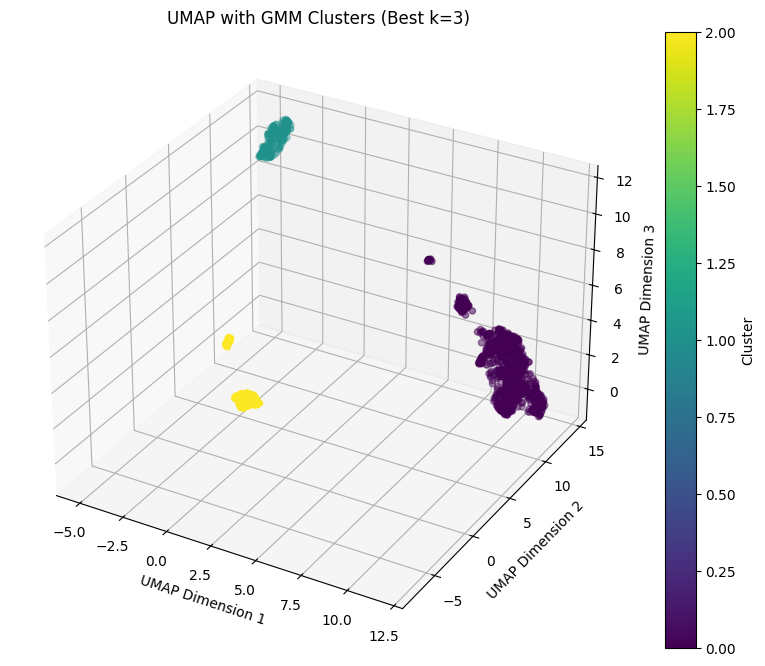

In [221]:
# Assuming the best k is predefined as 3 for visualization
best_k = 3

#  Running GMM with the best number of clusters
gmm = GaussianMixture(n_components=best_k, random_state=42)  # Initialize GMM with the best cluster count
clusters = gmm.fit_predict(data_umap)  # Fit the model and predict final clusters

# Adding cluster labels to UMAP-reduced data
data_umap_df = pd.DataFrame(data_umap, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])  # Convert UMAP output to DataFrame
data_umap_df['Cluster'] = clusters  # Add cluster labels as a column

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_umap, clusters)  # Calculate the Silhouette Score for the clustering

# Calculate Negative Log-Likelihood
nll = -gmm.score(data_umap) * len(data_umap)  # Calculate Negative Log-Likelihood by multiplying the score by the number of samples to scale

# # Store results
# results.append((n_clusters, silhouette_avg, nll))  # Append the results (number of clusters, silhouette score, and NLL) to the results list

# Print results
print(f"Number of Clusters: {best_k}, Silhouette Score: {silhouette_avg:.4f}, Negative Log-Likelihood: {nll:.2f}")  # Output the current number of clusters, silhouette score, and NLL


#  Visualizing UMAP-reduced data in 3D with GMM clustering
fig = plt.figure(figsize=(10, 8))  # Set figure size
ax = fig.add_subplot(111, projection='3d')  # Create a 3D plot
scatter = ax.scatter(
    data_umap_df['UMAP_1'],  # First UMAP dimension
    data_umap_df['UMAP_2'],  # Second UMAP dimension
    data_umap_df['UMAP_3'],  # Third UMAP dimension
    c=data_umap_df['Cluster'],  # Color points by cluster labels
    cmap='viridis'  # Use the 'viridis' colormap
)
ax.set_title(f'UMAP with GMM Clusters (Best k={best_k})')  # Set plot title
ax.set_xlabel('UMAP Dimension 1')  # Label X-axis
ax.set_ylabel('UMAP Dimension 2')  # Label Y-axis
ax.set_zlabel('UMAP Dimension 3')  # Label Z-axis
plt.colorbar(scatter, ax=ax, label='Cluster')  # Add a color bar to indicate clusters
plt.show()  # Display the 3D plot


### better understand and visualize the clusters

1. Cluster Descriptive Statistics

To interpret clusters, compute summary statistics (e.g., means, medians) for the original features in each cluster:

In [222]:
# Add cluster labels to the original dataset for analysis
reduced_data['Cluster'] = clusters

# Compute descriptive statistics for each cluster
cluster_stats = reduced_data.groupby('Cluster').mean()

# Display the statistics
print("Cluster Descriptive Statistics:\n", cluster_stats)


Cluster Descriptive Statistics:
          Do you have previous employers?  \
Cluster                                    
0                                    1.0   
1                                    1.0   
2                                    0.0   

         Have you ever sought treatment for a mental health issue from a mental health professional?  \
Cluster                                                                                                
0                                                 0.588933                                             
1                                                 0.646586                                             
2                                                 0.473373                                             

               Age  self-employed?  Employee_Size_Labeled  \
Cluster                                                     
0        33.819170        0.000000               3.730237   
1        37.277108        1.000000        

In [231]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Add cluster labels to the original dataset for analysis
reduced_data['Cluster'] = clusters

# Compute descriptive statistics for each cluster
cluster_stats = reduced_data.groupby('Cluster').mean()

# Display the statistics
print("Cluster Descriptive Statistics:\n", cluster_stats)


Cluster Descriptive Statistics:
          Do you have previous employers?  \
Cluster                                    
0                                    1.0   
1                                    1.0   
2                                    0.0   

         Have you ever sought treatment for a mental health issue from a mental health professional?  \
Cluster                                                                                                
0                                                 0.588933                                             
1                                                 0.646586                                             
2                                                 0.473373                                             

               Age  self-employed?  Employee_Size_Labeled  \
Cluster                                                     
0        33.819170        0.000000               3.730237   
1        37.277108        1.000000        

2. Feature Importance by Clusters

Identify features that distinguish clusters:

In [223]:
# Standard deviation for each feature across clusters
feature_importance = reduced_data.groupby('Cluster').std()

# Display the most distinguishing features
print("Feature Importance Across Clusters:\n", feature_importance)


Feature Importance Across Clusters:
          Do you have previous employers?  \
Cluster                                    
0                                    0.0   
1                                    0.0   
2                                    0.0   

         Have you ever sought treatment for a mental health issue from a mental health professional?  \
Cluster                                                                                                
0                                                 0.492271                                             
1                                                 0.478993                                             
2                                                 0.500774                                             

              Age  self-employed?  Employee_Size_Labeled  \
Cluster                                                    
0        7.469152        0.000000               1.514635   
1        8.656500        0.000000        

In [232]:

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Standard deviation for each feature across clusters
feature_importance = reduced_data.groupby('Cluster').std()

# Display the most distinguishing features
print("Feature Importance Across Clusters:\n", feature_importance)


Feature Importance Across Clusters:
          Do you have previous employers?  \
Cluster                                    
0                                    0.0   
1                                    0.0   
2                                    0.0   

         Have you ever sought treatment for a mental health issue from a mental health professional?  \
Cluster                                                                                                
0                                                 0.492271                                             
1                                                 0.478993                                             
2                                                 0.500774                                             

              Age  self-employed?  Employee_Size_Labeled  \
Cluster                                                    
0        7.469152        0.000000               1.514635   
1        8.656500        0.000000        

In [250]:
# Extract column names (features) from feature_importance DataFrame
feature_names = feature_importance.columns.tolist()

# Print the list of feature names
print("Feature Names:", feature_names)


Feature Names: ['Do you have previous employers?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'Age', 'self-employed?', 'Employee_Size_Labeled', 'work_position_Back-end Developer', 'work_position_Dev Evangelist/Advocate', 'work_position_Front-end Developer', 'work_position_Other', 'work_position_Supervisor/Team Lead', 'work_position_Support', 'Remote_Work_Level', 'Gender_Female', 'Gender_Non-binary/Other', 'Live_Country_Canada', 'Live_Country_Other Country', 'Live_Country_United Kingdom', 'Live_Country_United States of America', 'employer_formally_discussed_mh', 'previous_employers_formally_discuss_mh', 'Family_History_Mental_Illness_labeled', 'Past_MH_Disorder_labeled', 'Currently_MH_Disorder_labeled', 'Type of currently mental health disorders_ADHD', 'Type of currently mental health disorders_Anxiety Disorder', 'Type of currently mental health disorders_Mood Disorder', 'Type of currently mental health disorders_Other', 'diagnosed_mh_

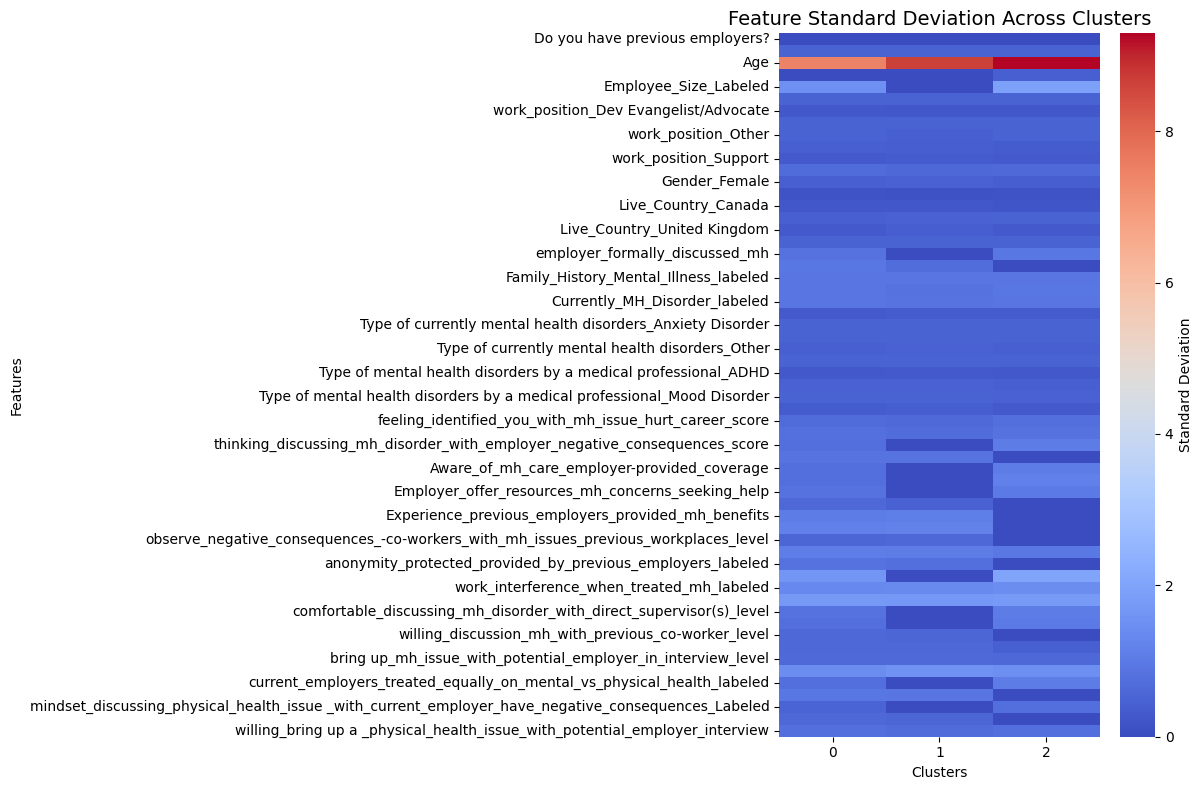

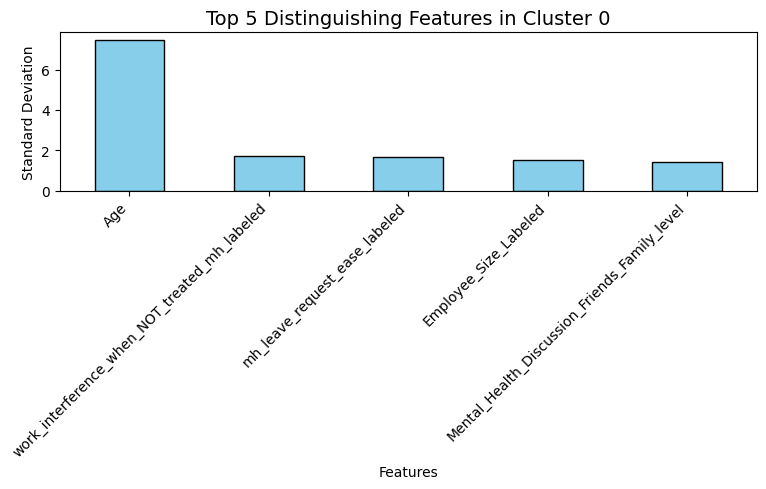

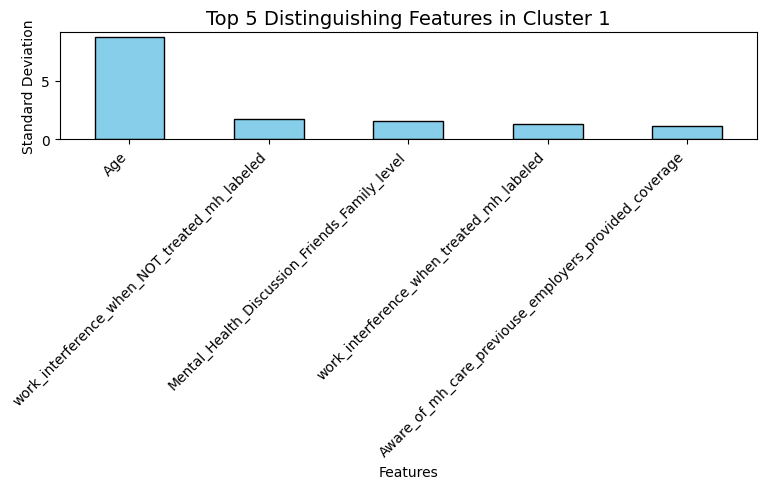

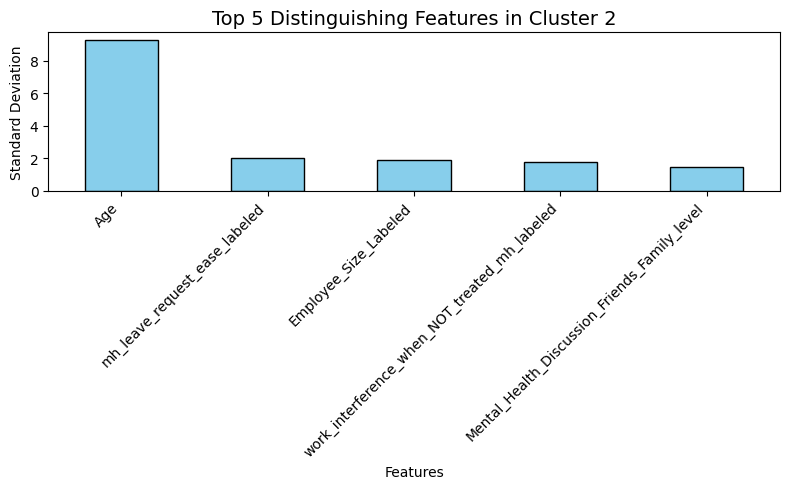

Top Features (without duplicates): ['mh_leave_request_ease_labeled', 'work_interference_when_treated_mh_labeled', 'Aware_of_mh_care_previouse_employers_provided_coverage', 'work_interference_when_NOT_treated_mh_labeled', 'Age', 'Mental_Health_Discussion_Friends_Family_level', 'Employee_Size_Labeled']


In [252]:

# نمایش تمام ستون‌ها
pd.set_option('display.max_columns', None)

# 1. Heatmap برای نمایش شدت تغییرات ویژگی‌ها در کلاسترها (بر اساس انحراف معیار)
plt.figure(figsize=(12, 8))
sns.heatmap(feature_importance.T, cmap="coolwarm", annot=False, fmt=".2f", cbar_kws={"label": "Standard Deviation"})
plt.title("Feature Standard Deviation Across Clusters", fontsize=14)
plt.xlabel("Clusters")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 2. Bar chart برای نمایش ویژگی‌های کلیدی هر کلاستر
# تعداد ویژگی‌های مهم
num_features = 5
# Create an empty set to store the top features without duplicates
unique_top_features = set()

for cluster in feature_importance.index:
    # انتخاب ویژگی‌هایی با بالاترین انحراف معیار در هر کلاستر
    top_features = feature_importance.loc[cluster].nlargest(num_features)

    # اضافه کردن نام ویژگی‌های انتخابی به مجموعه
    unique_top_features.update(top_features.index)

    # رسم نمودار برای ویژگی‌ها با بالاترین انحراف معیار
    plt.figure(figsize=(8, 5))
    top_features.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Top {num_features} Distinguishing Features in Cluster {cluster}", fontsize=14)
    plt.xlabel("Features")
    plt.ylabel("Standard Deviation")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# تبدیل مجموعه به لیست برای ذخیره نام ویژگی‌ها
top_features_list = list(unique_top_features)
print("Top Features (without duplicates):", top_features_list)



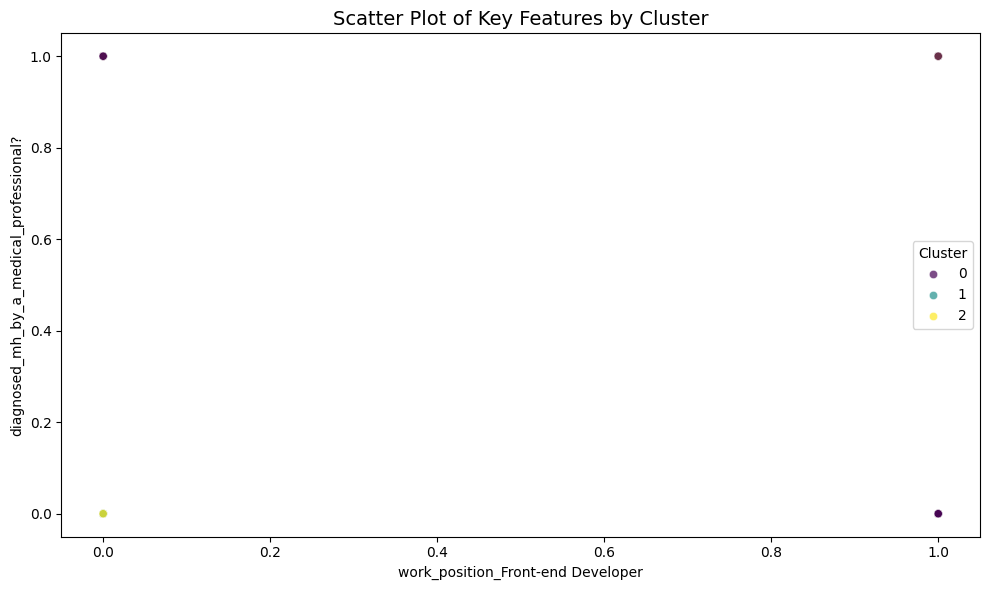

In [239]:

# 3. Scatter plot برای نمایش چند ویژگی برجسته در فضای دو بعدی
# انتخاب دو ویژگی برجسته
feature_x = 'work_position_Front-end Developer'  # جایگزین با نام واقعی ویژگی
feature_y = 'diagnosed_mh_by_a_medical_professional?'  # جایگزین با نام واقعی ویژگی

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=reduced_data,
    x=feature_x,
    y=feature_y,
    hue='Cluster',  # برچسب‌های کلاستر
    palette="viridis",
    alpha=0.7
)
plt.title("Scatter Plot of Key Features by Cluster", fontsize=14)
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

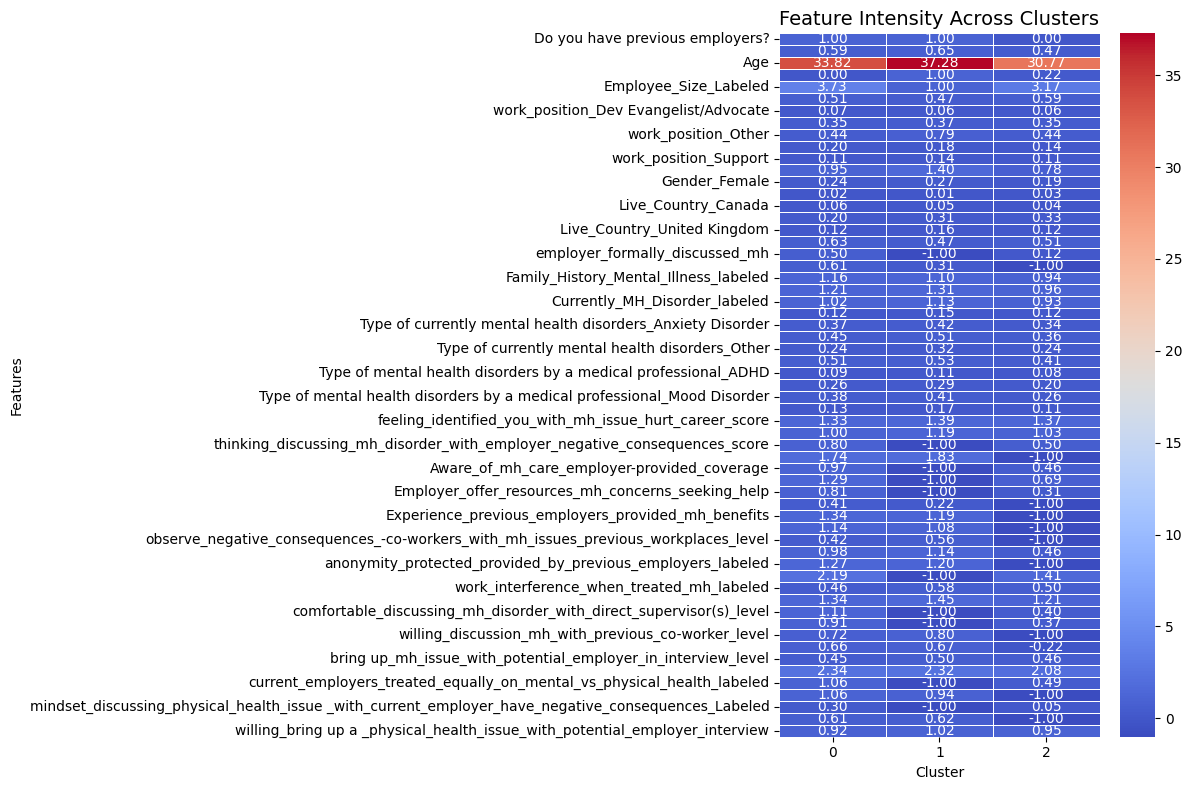

In [244]:
# میانگین مقادیر هر ویژگی در هر کلاستر
cluster_means = reduced_data.groupby('Cluster').mean()

# رسم Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    cluster_means.T,  # Transpose برای نمایش ویژگی‌ها در محور y
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=.5
)
plt.title("Feature Intensity Across Clusters", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


<ipython-input-245-8ba5671b99b0>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


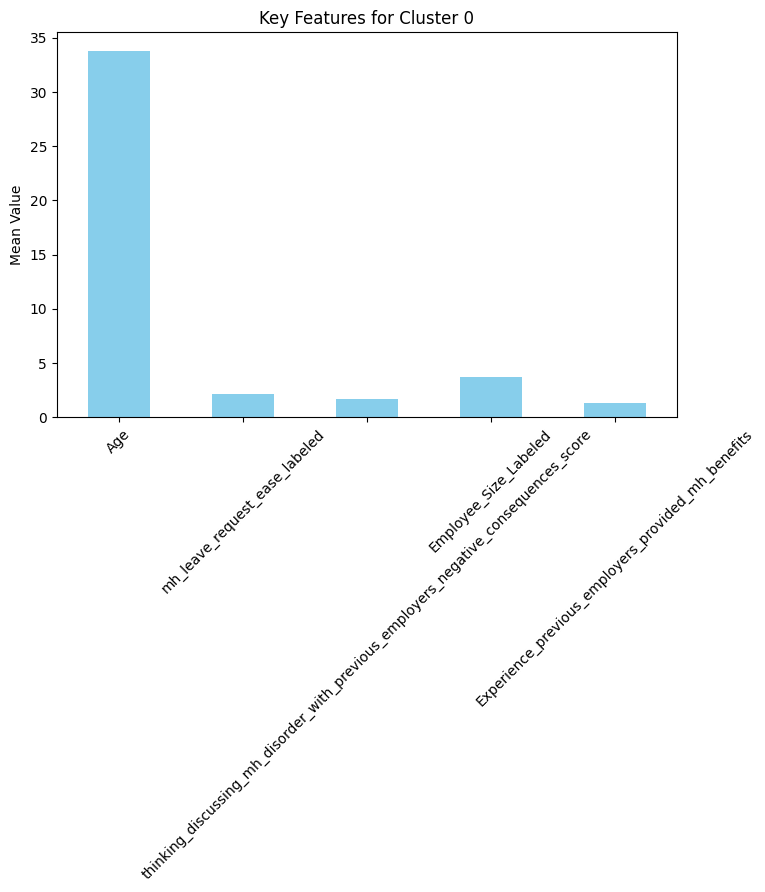

<ipython-input-245-8ba5671b99b0>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


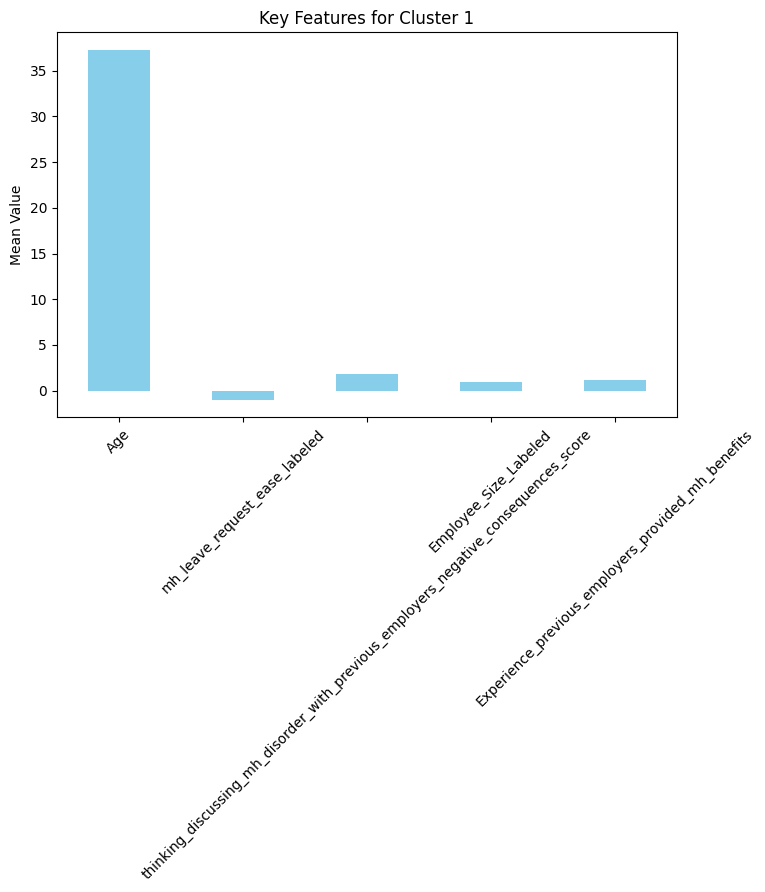

<ipython-input-245-8ba5671b99b0>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


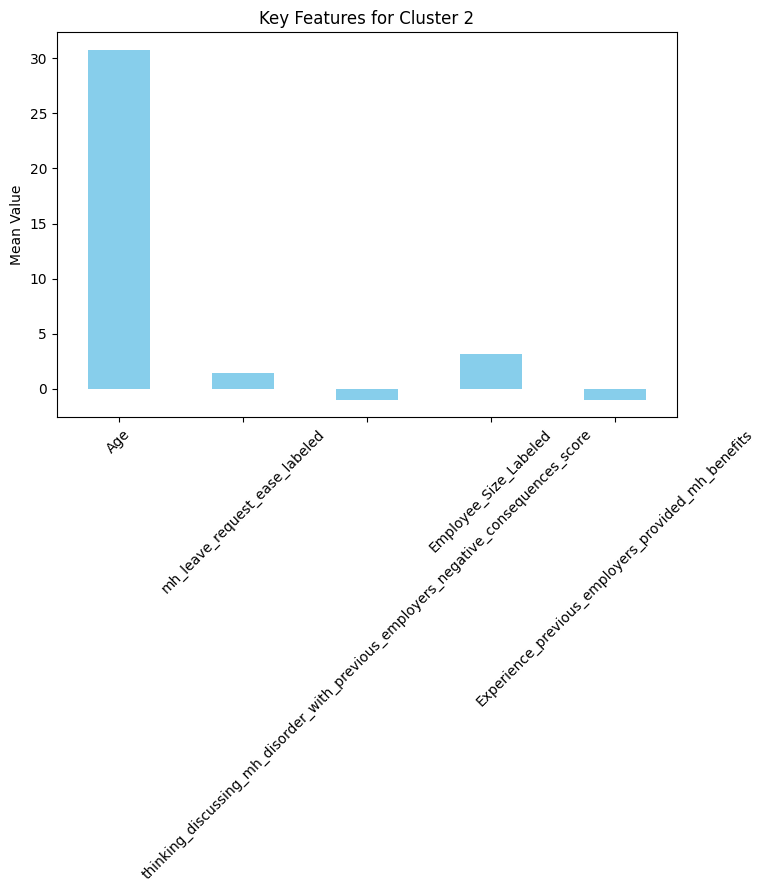

In [245]:
# انتخاب ویژگی‌های کلیدی با انحراف استاندارد بالا
key_features = cluster_means.std().sort_values(ascending=False).index[:5]

# رسم Bar Chart برای هر کلاستر
for cluster in reduced_data['Cluster'].unique():
    plt.figure(figsize=(8, 5))
    reduced_data[reduced_data['Cluster'] == cluster][key_features].mean().plot(kind='bar', color='skyblue')
    plt.title(f"Key Features for Cluster {cluster}")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


3. 2D Visualization with UMAP

A 3D plot can be difficult to interpret. A 2D scatter plot might provide a more concise overview:

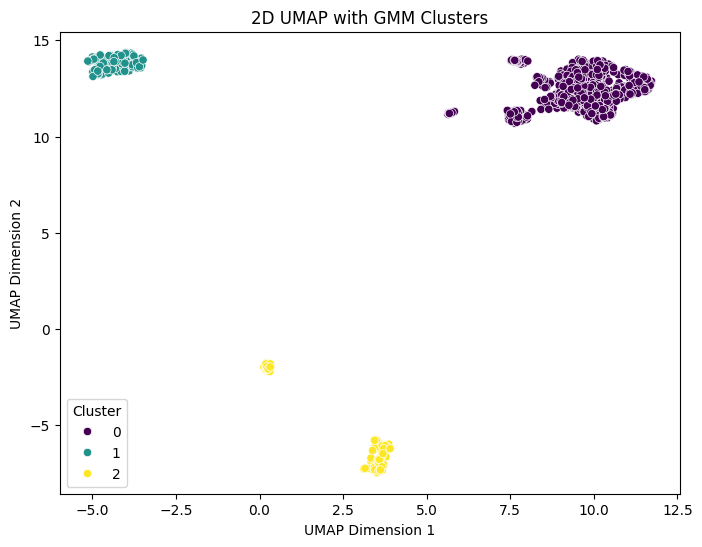

In [224]:
# Visualizing UMAP-reduced data in 2D with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=data_umap_df['UMAP_1'],
    y=data_umap_df['UMAP_2'],
    hue=data_umap_df['Cluster'],
    palette='viridis'
)
plt.title('2D UMAP with GMM Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', loc='best')
plt.show()


4. Cluster Size

Determine the size of each cluster:

In [233]:
# Count the number of samples in each cluster
cluster_sizes = reduced_data['Cluster'].value_counts()
# Display the cluster sizes
print("Cluster Sizes:\n", cluster_sizes)


Cluster Sizes:
 Cluster
0    1012
1     249
2     169
Name: count, dtype: int64


5. Cluster Profiles

For deeper insights, compare key features (e.g., work interference, employee size, and age) across clusters:

In [230]:
# # Key features to analyze
# key_features = ['work_interference_when_NOT_treated_mh', 'Employee_Size_Label', 'Age_scaled']

# Mean values of key features for each cluster
cluster_profiles = reduced_data.groupby('Cluster')[important_feature_names].mean()

# Display cluster profiles
print("Cluster Profiles:\n", cluster_profiles)


Cluster Profiles:
          Do you have previous employers?  \
Cluster                                    
0                                    1.0   
1                                    1.0   
2                                    0.0   

         Have you ever sought treatment for a mental health issue from a mental health professional?  \
Cluster                                                                                                
0                                                 0.588933                                             
1                                                 0.646586                                             
2                                                 0.473373                                             

               Age  self-employed?  Employee_Size_Labeled  \
Cluster                                                     
0        33.819170        0.000000               3.730237   
1        37.277108        1.000000               1.00000

In [234]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Mean values of key features for each cluster
cluster_profiles = reduced_data.groupby('Cluster')[important_feature_names].mean()

# Display cluster profiles
print("Cluster Profiles:\n", cluster_profiles)

Cluster Profiles:
          Do you have previous employers?  \
Cluster                                    
0                                    1.0   
1                                    1.0   
2                                    0.0   

         Have you ever sought treatment for a mental health issue from a mental health professional?  \
Cluster                                                                                                
0                                                 0.588933                                             
1                                                 0.646586                                             
2                                                 0.473373                                             

               Age  self-employed?  Employee_Size_Labeled  \
Cluster                                                     
0        33.819170        0.000000               3.730237   
1        37.277108        1.000000               1.00000

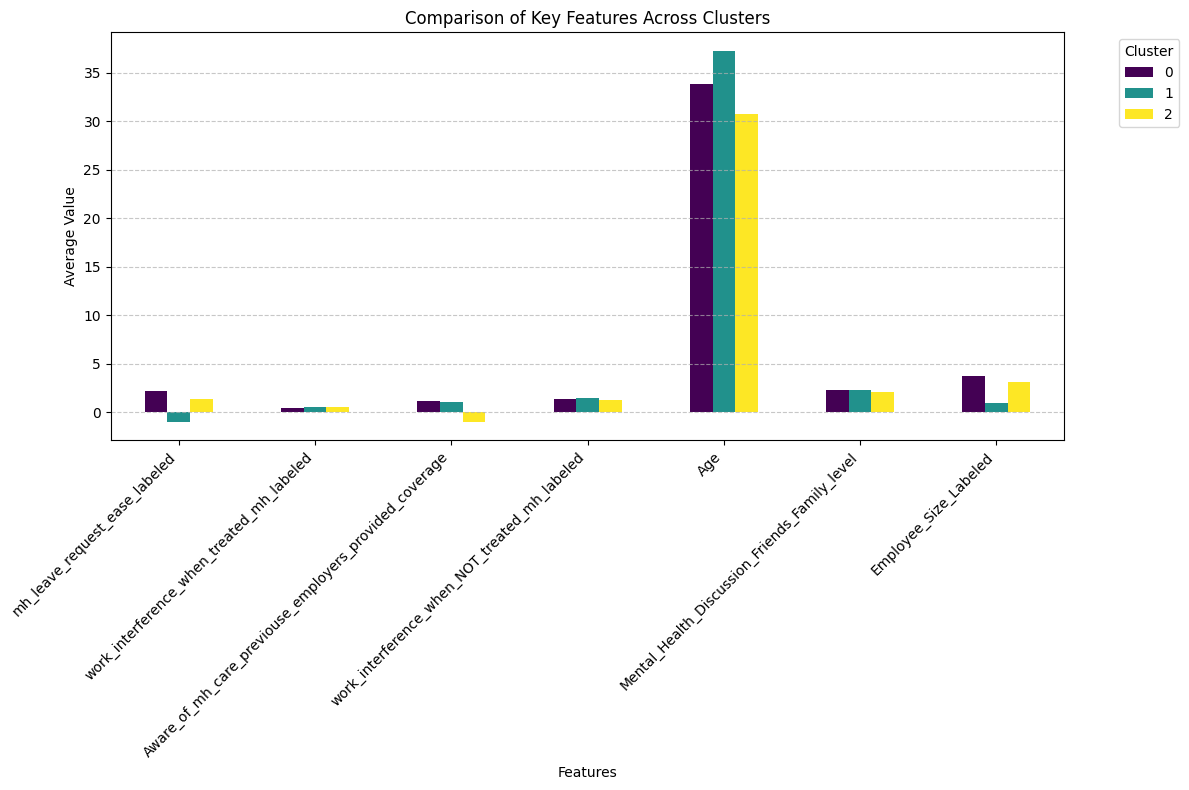

In [256]:
#yani chi?

# # Calculate mean values of key features for each cluster
cluster_means = reduced_data.groupby('Cluster')[top_features_list].mean()

# Plot a comparative bar chart for the features
cluster_means.T.plot(kind="bar", figsize=(12, 8), colormap="viridis")
plt.title("Comparison of Key Features Across Clusters")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Cluster", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Tahlil khoshe


In [218]:
info

NameError: name 'info' is not defined

In [ ]:
import pandas as pd

# محاسبه خلاصه آماری (میانگین) برای هر خوشه
cluster_summary = data_umap_df.groupby('Cluster').mean()

# نمایش تعداد افراد در هر خوشه
cluster_counts = data_umap_df['Cluster'].value_counts()

# ذخیره خلاصه آماری خوشه‌ها در فایل اکسل
with pd.ExcelWriter('Cluster_Analysis.xlsx') as writer:
    cluster_summary.to_excel(writer, sheet_name='Cluster_Summary')  # خلاصه خوشه‌ها
    cluster_counts.to_frame(name='Counts').to_excel(writer, sheet_name='Cluster_Counts')  # تعداد هر خوشه

print("تحلیل ویژگی‌های کلیدی خوشه‌ها در فایل 'Cluster_Analysis.xlsx' ذخیره شد.")


In [ ]:
# تعداد و درصد نمونه‌ها در هر خوشه
cluster_counts = data_umap_df['Cluster'].value_counts()
cluster_percentages = (cluster_counts / len(data_umap_df) * 100).round(2)

# نمایش تعداد و درصد هر خوشه
cluster_info = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage (%)': cluster_percentages.values
})
print(cluster_info)

# رسم نمودار
plt.figure(figsize=(10, 6))
cluster_info.set_index('Cluster')['Percentage (%)'].plot(kind='bar', color='skyblue')
plt.title('درصد نمونه‌ها در هر خوشه')
plt.xlabel('خوشه')
plt.ylabel('درصد')
plt.xticks(rotation=0)
plt.show()


In [ ]:
# Step 1: Combine UMAP-reduced data and original features
# Assuming `original_data` is the DataFrame with original features (before scaling/reduction)
data_with_clusters = data.copy()  # Create a copy of the original data
data_with_clusters['Cluster'] = clusters  # Add cluster labels to the original data

# Step 2: Analyzing cluster distribution for each feature
cluster_means = data_with_clusters.groupby('Cluster').mean()  # Calculate mean values for each cluster
cluster_stds = data_with_clusters.groupby('Cluster').std()  # Calculate standard deviation for each cluster

print("\nمیانگین ویژگی‌ها برای هر خوشه:")
print(cluster_means)

# Step 3: Visualizing feature distributions per cluster
# Select top features based on variance between clusters
feature_variance = cluster_means.var(axis=0).sort_values(ascending=False)  # Variance of features across clusters
top_features = feature_variance.head(5).index.tolist()  # Select top 5 features with highest variance

print("\nویژگی‌های برتر با بالاترین واریانس بین خوشه‌ها:")
print(top_features)

# Plot distributions for top features
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Cluster', y=feature, data=data_with_clusters, palette='viridis')  # Boxplot of feature per cluster
    plt.title(f'Top Feature Distribution by Cluster: {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Step 4: Visualizing clusters in a pairplot for top features
# Create a pairplot for top features with cluster labels
sns.pairplot(data_with_clusters[top_features + ['Cluster']], hue='Cluster', palette='viridis', corner=True)
plt.suptitle('Pairplot of Top Features by Cluster', y=1.02)
plt.show()

# Step 5: Evaluating Silhouette Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_umap, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.4f}")

# Step 6: Summary of cluster sizes and percentages
cluster_counts = data_with_clusters['Cluster'].value_counts()
cluster_percentages = cluster_counts / len(data_with_clusters) * 100

summary_df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage (%)': cluster_percentages.values
})
print("\nخلاصه تعداد و درصد هر خوشه:")
print(summary_df)


In [ ]:
import pandas as pd

# Step 1: Calculate the mean values for each cluster
cluster_means = data_with_clusters.groupby('Cluster').mean()

# Step 2: Save the cluster means to an Excel file
output_file = "cluster_means.xlsx"  # Specify the output file name
cluster_means.to_excel(output_file, index=True)  # Save to Excel

print(f"\nمیانگین ویژگی‌های هر خوشه با موفقیت در فایل '{output_file}' ذخیره شد.")


In [ ]:


# Calculate the absolute difference between means of each feature across clusters
feature_importance = cluster_means.iloc[:, 1:].apply(lambda x: np.ptp(x), axis=0)

# Define a threshold to filter important features (e.g., top 5 features by difference)
top_features_per_cluster = 5  # Select top 5 features per cluster

# Sort features by importance (descending order) and get top N features
important_features = feature_importance.sort_values(ascending=False).head(top_features_per_cluster)

# Display the important feature names
print("Top important features across clusters:")
print(important_features)

# If you want to save the result to an Excel file
important_features.to_excel("important_features.xlsx", index=True)
print("The important features have been saved to 'important_features.xlsx'.")


In [ ]:
import pandas as pd
import numpy as np

# Assuming `data_umap` is your UMAP-reduced dataset and `cluster_labels` are the GMM cluster assignments
# Combine the data and cluster labels for analysis
data_umap['Cluster'] = cluster_labels  # Add cluster labels to the reduced data

# Group by clusters and calculate the mean of each feature
cluster_summary = data_umap.groupby('Cluster').mean()

# Display the summary to understand cluster characteristics
print("Cluster Summary (Mean Values):")
print(cluster_summary)

# Optionally, calculate additional statistics like medians or counts
cluster_counts = data_umap['Cluster'].value_counts()
print("\nNumber of Participants per Cluster:")
print(cluster_counts)


### Searching for the best Dimentional Reduction with the clustering

##### Dimensionality Reduction Using UMAP

In [ ]:
# Dimensionality reduction using UMAP
umap_model = umap.UMAP(n_components=3, random_state=42)  # Initialize UMAP to reduce data to 3 dimensions
data_umap = umap_model.fit_transform(data_scaled)  # Apply UMAP to the scaled data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


###### Clustering Data Using Kmean After Dimensionality Reduction with UMPA

Number of Clusters: 2, Silhouette Score: 0.6477
Number of Clusters: 3, Silhouette Score: 0.8427
Number of Clusters: 4, Silhouette Score: 0.6070
Number of Clusters: 5, Silhouette Score: 0.5428
Number of Clusters: 6, Silhouette Score: 0.5658
Number of Clusters: 7, Silhouette Score: 0.5135
Number of Clusters: 8, Silhouette Score: 0.5805
Number of Clusters: 9, Silhouette Score: 0.5171
Number of Clusters: 10, Silhouette Score: 0.5278

Best Number of Clusters: 3, Best Silhouette Score: 0.8427


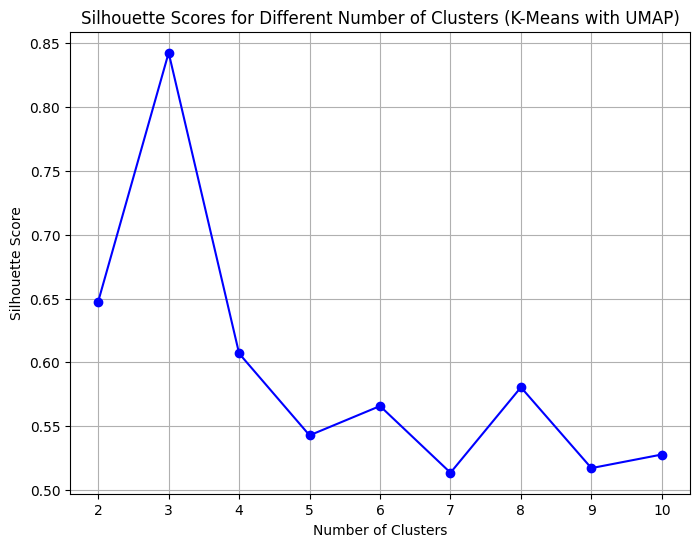

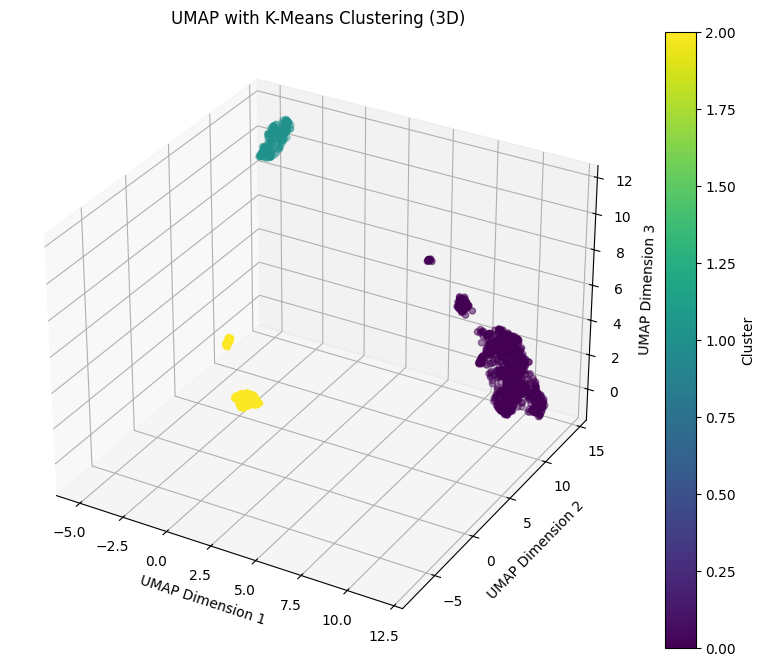

In [ ]:

#  Finding the optimal number of clusters (k) with K-Means
best_k = None  # Variable to store the best number of clusters
best_score = -1  # Variable to store the highest silhouette score
silhouette_scores = []  # List to store silhouette scores for each k

for n_clusters in range(2, 11):  # Test cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # Run K-Means for each k
    clusters = kmeans.fit_predict(data_umap)  # Predict cluster labels

    # Calculate the silhouette score
    score = silhouette_score(data_umap, clusters)
    silhouette_scores.append((n_clusters, score))

    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

    # Update the best k and highest score
    if score > best_score:
        best_k = n_clusters
        best_score = score

print(f"\nBest Number of Clusters: {best_k}, Best Silhouette Score: {best_score:.4f}")

#  Plotting the silhouette scores
clusters, scores = zip(*silhouette_scores)
plt.figure(figsize=(8, 6))
plt.plot(clusters, scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Number of Clusters (K-Means with UMAP)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#  Running K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_clusters = kmeans.fit_predict(data_umap)  # Predict cluster labels with the best k

#  Adding cluster labels to the reduced data
data_umap_df = pd.DataFrame(data_umap, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])
data_umap_df['Cluster'] = final_clusters

#  Visualizing data in 3D with the best number of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_umap_df['UMAP_1'],  # First UMAP dimension
    data_umap_df['UMAP_2'],  # Second UMAP dimension
    data_umap_df['UMAP_3'],  # Third UMAP dimension
    c=data_umap_df['Cluster'],  # Cluster labels for coloring
    cmap='viridis'
)
ax.set_title('UMAP with K-Means Clustering (3D)')
ax.set_xlabel('UMAP Dimension 1')
ax.set_ylabel('UMAP Dimension 2')
ax.set_zlabel('UMAP Dimension 3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


###### Clustering Data Using GMM After Dimensionality Reduction with UMPA

Number of Clusters: 2, Silhouette Score: 0.6477
Number of Clusters: 3, Silhouette Score: 0.8427
Number of Clusters: 4, Silhouette Score: 0.5771
Number of Clusters: 5, Silhouette Score: 0.5080
Number of Clusters: 6, Silhouette Score: 0.5628
Number of Clusters: 7, Silhouette Score: 0.4895
Number of Clusters: 8, Silhouette Score: 0.5653
Number of Clusters: 9, Silhouette Score: 0.4890
Number of Clusters: 10, Silhouette Score: 0.4993

Best Number of Clusters: 3, Best Silhouette Score: 0.8427


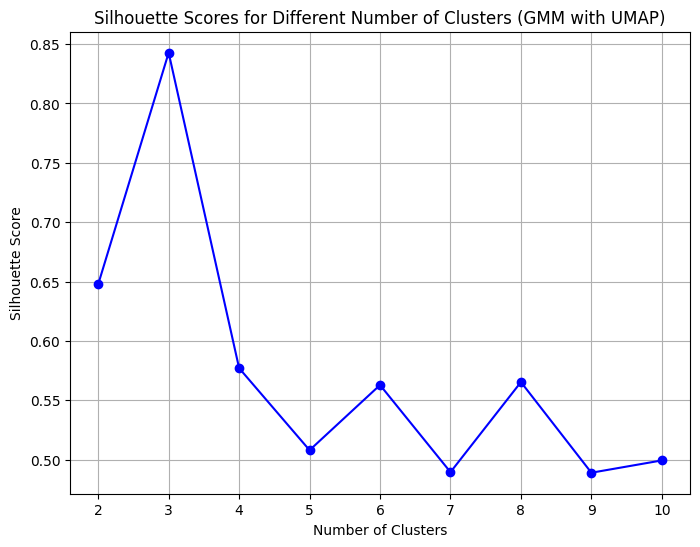

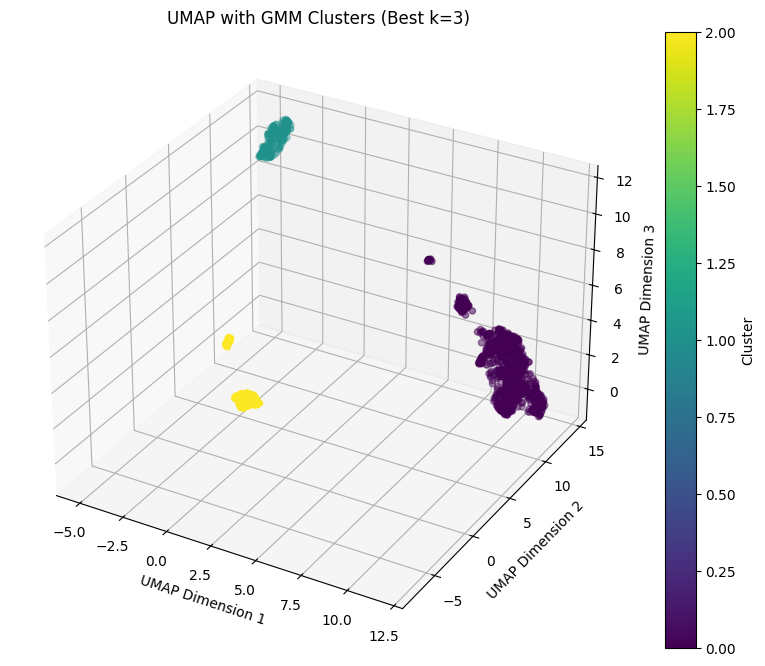

In [ ]:
#  Finding the optimal number of clusters (k) using GMM
best_k = None  # Variable to store the best number of clusters
best_score = -1  # Initialize the best Silhouette score
silhouette_scores = []  # List to store silhouette scores for each number of clusters

for n_clusters in range(2, 11):  # Iterate over cluster counts from 2 to 10
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)  # Initialize GMM with current cluster count
    clusters = gmm.fit_predict(data_umap)  # Fit the model and predict cluster labels

    # Calculate the Silhouette Score for current clustering
    score = silhouette_score(data_umap, clusters)
    silhouette_scores.append((n_clusters, score))  # Store the score for analysis

    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score:.4f}")  # Display the current score

    # Update best_k and best_score if the current score is the highest
    if score > best_score:
        best_k = n_clusters
        best_score = score

print(f"\nBest Number of Clusters: {best_k}, Best Silhouette Score: {best_score:.4f}")  # Print the best result


clusters, scores = zip(*silhouette_scores)  # Extract cluster numbers and scores
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(clusters, scores, marker='o', linestyle='-', color='b')  # Plot silhouette scores
plt.title('Silhouette Scores for Different Number of Clusters (GMM with UMAP)')  # Set title
plt.xlabel('Number of Clusters')  # Label X-axis
plt.ylabel('Silhouette Score')  # Label Y-axis
plt.grid(True)  # Enable grid for readability
plt.show()  # Display the plot

# Assuming the best k is predefined as 3 for visualization
best_k = 3

#  Running GMM with the best number of clusters
gmm = GaussianMixture(n_components=best_k, random_state=42)  # Initialize GMM with the best cluster count
clusters = gmm.fit_predict(data_umap)  # Fit the model and predict final clusters

# Adding cluster labels to UMAP-reduced data
data_umap_df = pd.DataFrame(data_umap, columns=['UMAP_1', 'UMAP_2', 'UMAP_3'])  # Convert UMAP output to DataFrame
data_umap_df['Cluster'] = clusters  # Add cluster labels as a column

#  Visualizing UMAP-reduced data in 3D with GMM clustering
fig = plt.figure(figsize=(10, 8))  # Set figure size
ax = fig.add_subplot(111, projection='3d')  # Create a 3D plot
scatter = ax.scatter(
    data_umap_df['UMAP_1'],  # First UMAP dimension
    data_umap_df['UMAP_2'],  # Second UMAP dimension
    data_umap_df['UMAP_3'],  # Third UMAP dimension
    c=data_umap_df['Cluster'],  # Color points by cluster labels
    cmap='viridis'  # Use the 'viridis' colormap
)
ax.set_title(f'UMAP with GMM Clusters (Best k={best_k})')  # Set plot title
ax.set_xlabel('UMAP Dimension 1')  # Label X-axis
ax.set_ylabel('UMAP Dimension 2')  # Label Y-axis
ax.set_zlabel('UMAP Dimension 3')  # Label Z-axis
plt.colorbar(scatter, ax=ax, label='Cluster')  # Add a color bar to indicate clusters
plt.show()  # Display the 3D plot


 gh=

In [ ]:
# Performing PCA to explain 80% of the variance
pca = PCA(n_components=0.80)  # Retain components that explain 80% of the variance
data_pca = pca.fit_transform(data_scaled)  # Apply PCA to the scaled data
print(f"Number of components for 80% variance: {data_pca.shape[1]}")  # Print the number of components used


Number of components for 80% variance: 24


##### Dimensionality Reduction Using TSNE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
tsne_model = TSNE(n_components=3, perplexity=30, random_state=42)
data_tsne = tsne_model.fit_transform(data_scaled)


###### Clustering Data Using GMM After Dimensionality Reduction with TSNE

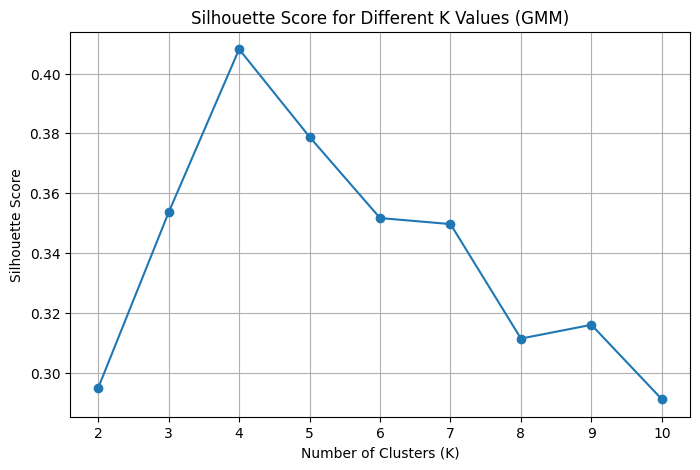

Best number of clusters (K) based on Silhouette Score: 4


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Define a range of K values to test for clustering
k_values = range(2, 11)  # Test K values from 2 to 10
silhouette_scores = []  # Initialize a list to store silhouette scores for each K

# Step 2: Compute Silhouette Score for each K value
for k in k_values:
    gmm = GaussianMixture(n_components=k, random_state=42)  # Initialize GMM with K components
    clusters = gmm.fit_predict(data_tsne)  # Fit the model and predict cluster labels
    score = silhouette_score(data_tsne, clusters)  # Calculate the silhouette score
    silhouette_scores.append(score)  # Append the score to the list

# Step 3: Plot the Silhouette Scores for different K values
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(k_values, silhouette_scores, marker='o')  # Plot K values vs. silhouette scores
plt.title('Silhouette Score for Different K Values (GMM)')  # Add plot title
plt.xlabel('Number of Clusters (K)')  # Label X-axis
plt.ylabel('Silhouette Score')  # Label Y-axis
plt.grid(True)  # Enable grid for better visualization
plt.show()  # Display the plot

# Step 4: Print the best K based on the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]  # Find the K with the maximum score
print(f"Best number of clusters (K) based on Silhouette Score: {best_k}")  # Print the optimal K


###### Clustering Data Using Kmean After Dimensionality Reduction with TSNE

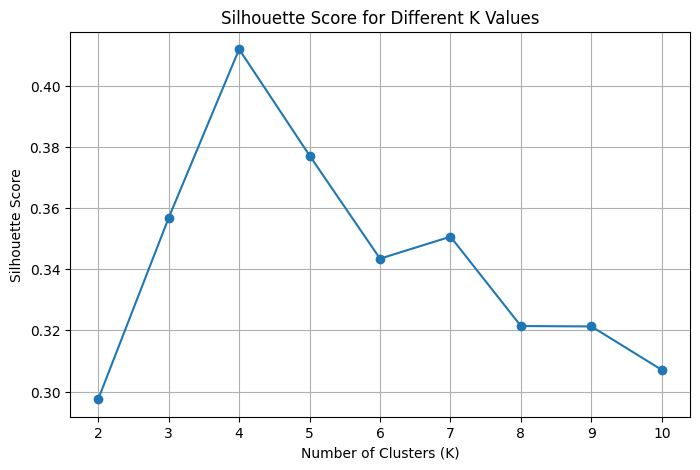

Best number of clusters (K) based on Silhouette Score: 4


In [ ]:

# Step 1: Define a range of K values to test for clustering
k_values = range(2, 11)  # Test K values from 2 to 10
silhouette_scores = []  # Initialize a list to store silhouette scores for each K

# Step 2: Compute Silhouette Score for each K value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)  # Initialize K-Means with K clusters
    clusters = kmeans.fit_predict(data_tsne)  # Fit the model and predict cluster labels
    score = silhouette_score(data_tsne, clusters)  # Calculate the silhouette score
    silhouette_scores.append(score)  # Append the score to the list

# Step 3: Plot the Elbow Curve (Silhouette Score for each K)
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(k_values, silhouette_scores, marker='o')  # Plot K values vs. silhouette scores
plt.title('Silhouette Score for Different K Values')  # Add plot title
plt.xlabel('Number of Clusters (K)')  # Label X-axis
plt.ylabel('Silhouette Score')  # Label Y-axis
plt.grid(True)  # Enable grid for better visualization
plt.show()  # Display the plot

# Step 4: Print the best K based on the highest silhouette score
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]  # Find the K with the maximum score
print(f"Best number of clusters (K) based on Silhouette Score: {best_k}")  # Print the optimal K

##### Dimensionality Reduction Using PCA

In [ ]:
# Performing PCA to explain 80% of the variance
pca = PCA(n_components=0.80)  # Retain components that explain 80% of the variance
data_pca = pca.fit_transform(data_scaled)  # Apply PCA to the scaled data
print(f"Number of components for 80% variance: {data_pca.shape[1]}")  # Print the number of components used


Number of components for 80% variance: 24


###### Clustering Data Using Kmean After Dimensionality Reduction with PCA

Number of components for 80% variance: 24
Number of Clusters: 2, Silhouette Score: 0.1226
Number of Clusters: 3, Silhouette Score: 0.1395
Number of Clusters: 4, Silhouette Score: 0.1640
Number of Clusters: 5, Silhouette Score: 0.1389
Number of Clusters: 6, Silhouette Score: 0.1284
Number of Clusters: 7, Silhouette Score: 0.1015
Number of Clusters: 8, Silhouette Score: 0.1104
Number of Clusters: 9, Silhouette Score: 0.1043
Number of Clusters: 10, Silhouette Score: 0.1028

Best Number of Clusters: 4, Best Silhouette Score: 0.1640


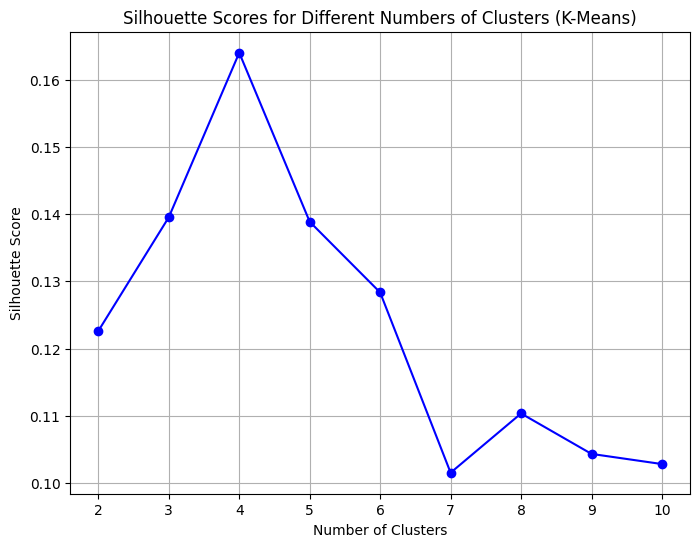

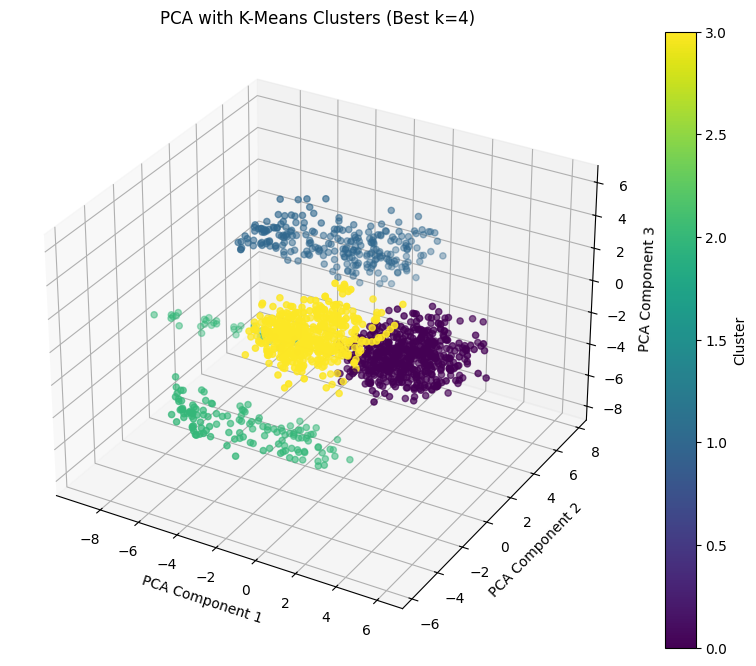

In [ ]:
#  Perform PCA and retain components explaining 80% of variance
pca = PCA(n_components=0.80)
data_pca = pca.fit_transform(data_scaled)
print(f"Number of components for 80% variance: {data_pca.shape[1]}")

#  Find the optimal number of clusters using K-Means and silhouette scores
best_k = None
best_score = -1
silhouette_scores = []

for n_clusters in range(2, 11):  # Test number of clusters from 2 to 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data_pca)

    # Calculate Silhouette Score
    score = silhouette_score(data_pca, clusters)
    silhouette_scores.append((n_clusters, score))

    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

    # Update best k if this score is the highest
    if score > best_score:
        best_k = n_clusters
        best_score = score

print(f"\nBest Number of Clusters: {best_k}, Best Silhouette Score: {best_score:.4f}")

#  Plot Silhouette Scores for different numbers of clusters
clusters, scores = zip(*silhouette_scores)
plt.figure(figsize=(8, 6))
plt.plot(clusters, scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Numbers of Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#  Run K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(data_pca)

#  Add PCA data and cluster labels to a DataFrame
columns = [f'PCA_{i+1}' for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=columns)
data_pca_df['Cluster'] = clusters

#  Plot data in 3D space using the first three PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_pca_df['PCA_1'],  # First principal component
    data_pca_df['PCA_2'],  # Second principal component
    data_pca_df['PCA_3'],  # Third principal component
    c=data_pca_df['Cluster'],
    cmap='viridis'
)
ax.set_title(f'PCA with K-Means Clusters (Best k={best_k})')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

###### Clustering Data Using GMM After Dimensionality Reduction with PCA

Number of components for 80% variance: 24
Number of Clusters: 2, Silhouette Score: 0.1078
Number of Clusters: 3, Silhouette Score: 0.1285
Number of Clusters: 4, Silhouette Score: 0.1541
Number of Clusters: 5, Silhouette Score: 0.1329
Number of Clusters: 6, Silhouette Score: 0.1071
Number of Clusters: 7, Silhouette Score: 0.0739
Number of Clusters: 8, Silhouette Score: 0.1064
Number of Clusters: 9, Silhouette Score: 0.0947
Number of Clusters: 10, Silhouette Score: 0.0931

Best Number of Clusters: 4, Best Silhouette Score: 0.1541


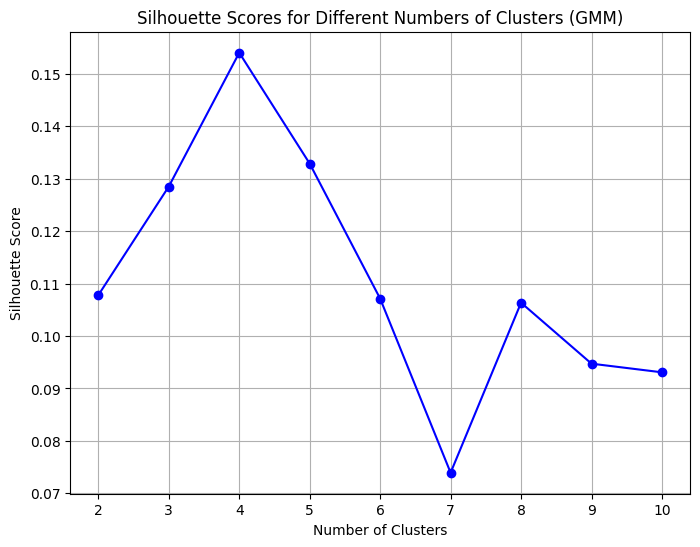

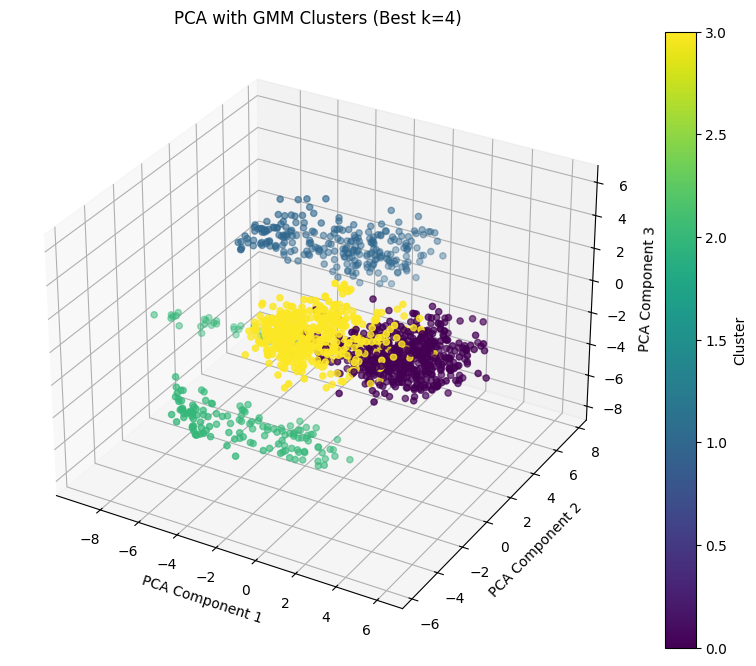

In [ ]:
#  Perform PCA and retain components explaining 85% of variance
pca = PCA(n_components=0.80)
data_pca = pca.fit_transform(data_scaled)
print(f"Number of components for 80% variance: {data_pca.shape[1]}")

#  Find the optimal number of clusters using GMM and silhouette scores
best_k = None
best_score = -1
silhouette_scores = []

for n_clusters in range(2, 11):  # Test number of clusters from 2 to 10
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    clusters = gmm.fit_predict(data_pca)

    # Calculate Silhouette Score
    score = silhouette_score(data_pca, clusters)
    silhouette_scores.append((n_clusters, score))

    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score:.4f}")

    # Update best k if this score is the highest
    if score > best_score:
        best_k = n_clusters
        best_score = score

print(f"\nBest Number of Clusters: {best_k}, Best Silhouette Score: {best_score:.4f}")

#  Plot Silhouette Scores for different numbers of clusters
clusters, scores = zip(*silhouette_scores)
plt.figure(figsize=(8, 6))
plt.plot(clusters, scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Numbers of Clusters (GMM)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

#  Run GMM with the optimal number of clusters
gmm = GaussianMixture(n_components=best_k, random_state=42)
clusters = gmm.fit_predict(data_pca)

#  Add PCA data and cluster labels to a DataFrame
columns = [f'PCA_{i+1}' for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=columns)
data_pca_df['Cluster'] = clusters

#  Plot data in 3D space using the first three PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    data_pca_df['PCA_1'],  # First principal component
    data_pca_df['PCA_2'],  # Second principal component
    data_pca_df['PCA_3'],  # Third principal component
    c=data_pca_df['Cluster'],
    cmap='viridis'
)
ax.set_title(f'PCA with GMM Clusters (Best k={best_k})')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.show()


###### Clustering Data Using DBSCAN After Dimensionality Reduction with PCA

Number of components for 80% variance: 24
DBSCAN could not identify meaningful clusters.
Number of clusters: 0
Number of noise points: 1430


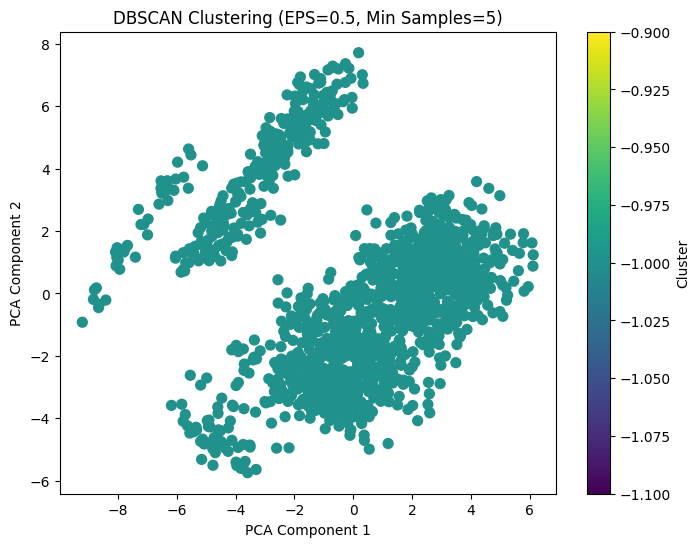

In [ ]:


# Step 1: Apply PCA for dimensionality reduction to retain 80% variance
pca = PCA(n_components=0.80)  # Retain 80% of the variance
X_pca = pca.fit_transform(data_scaled)  # Transform scaled data using PCA
print(f"Number of components for 80% variance: {X_pca.shape[1]}")  # Print the number of components

# Step 2: Apply the DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Configure DBSCAN parameters (eps and min_samples are tunable)
clusters = dbscan.fit_predict(X_pca)  # Fit the model and assign cluster labels

# Step 3: Evaluate clustering performance
if len(set(clusters)) > 1 and -1 not in clusters:  # Check if DBSCAN found meaningful clusters (excluding noise)
    silhouette_avg = silhouette_score(X_pca, clusters)  # Compute silhouette score
    print(f"Silhouette Score: {silhouette_avg:.2f}")  # Print the silhouette score
else:
    print("DBSCAN could not identify meaningful clusters.")  # Indicate failure to cluster meaningfully

# Step 4: Check the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Count clusters, excluding noise
n_noise = list(clusters).count(-1)  # Count noise points
print(f"Number of clusters: {n_clusters}")  # Print the number of clusters
print(f"Number of noise points: {n_noise}")  # Print the number of noise points

# Step 5: Reduce data to 2 PCA components for visualization
pca_2d = PCA(n_components=2)  # Reduce data to 2 components for plotting
X_pca_2d = pca_2d.fit_transform(data_scaled)  # Transform the scaled data

# Step 6: Visualize the clustering result
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(
    X_pca_2d[:, 0], X_pca_2d[:, 1],  # Plot data points in 2D PCA space
    c=clusters,  # Use cluster labels for color
    cmap='viridis',  # Use the 'viridis' colormap
    s=50  # Set marker size
)
plt.title(f'DBSCAN Clustering (EPS=0.5, Min Samples=5)')  # Add title
plt.xlabel('PCA Component 1')  # Label X-axis
plt.ylabel('PCA Component 2')  # Label Y-axis
plt.colorbar(label='Cluster')  # Add a color bar to indicate clusters
plt.show()  # Display the plot
